In [1]:
import sys
sys.path.append(r'C:\Users\User\jupyter\KaelanML')               

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
import missingno
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [5]:
titan = pd.read_csv(r'C:\Users\User\Dropbox\My PC (LAPTOP-M5BSHAM1)\Desktop\Excel DataCentre\Kaggle\Titanic\train.csv')

In [6]:
X = titan[['Pclass','Age','Sex','SibSp','Parch','Embarked','Fare']]

In [7]:
median_age = X.Age.median()
mode_embarked = X.Embarked.mode()[0]
X = X.fillna({'Age': median_age, 'Embarked':mode_embarked})

In [8]:
y = titan['Survived']

In [11]:
test = pd.read_csv(r'C:\Users\User\Dropbox\My PC (LAPTOP-M5BSHAM1)\Desktop\Excel DataCentre\Kaggle\Titanic\test.csv')

### Validate sample assumption


####   Sample submission assumes all female passengers survived and all male passengers died. 

In [25]:
#sur = tits.Survived == 1
#female = tits.Sex == 'female'
#tits[sur][female]
#womenlived = sum(tits[sur][female]['Survived'])
#womenlived

women = titan.loc[titan.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
women_survivor = sum(women)
No_women = len(women)
print("% of women who survived:", rate_women)
print('Number of women survived:', women_survivor)
print('Number of women onboard:', No_women)

% of women who survived: 0.7420382165605095
Number of women survived: 233
Number of women onboard: 314


In [26]:
men = titan.loc[titan.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
men_survivor = sum(men)
No_men = len(men)
print("% of men who survived:", rate_men)
print('Number of men survived:', men_survivor)
print('Number of men onboard:', No_men)

% of men who survived: 0.18890814558058924
Number of men survived: 109
Number of men onboard: 577


In [27]:
titan.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [28]:
survivors = titan.Survived == 1
titan[survivors]
Total_survived = titan[survivors]['Survived'].sum()
print('Total survivals:', Total_survived)
print('Percentage all total survivors are women:', women_survivor/Total_survived)
print('Percentage all total survivors are men:', men_survivor/Total_survived)
print('Odds of survial:', Total_survived/891)

Total survivals: 342
Percentage all total survivors are women: 0.6812865497076024
Percentage all total survivors are men: 0.31871345029239767
Odds of survial: 0.3838383838383838


### Conclusion from sample assumption

-  **Approx 19% of men and 74 % of women survived the sinking of Titanic. Just looking at the 2 gender population its seems that women tend to survive however not all did . And if we look at the survivor population , approx 31.8 percent of survivors are men. So the sample assumption does not  hold True .  Though we can deduce that males tend to have higher mortality rates in this set of training data.**

In [27]:
from sklearn.ensemble import RandomForestClassifier

y = titan["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(titan[features])
X_test = pd.get_dummies(test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)
print(sum(predictions == y_test)/len(y_test))

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

NameError: name 'test' is not defined

### Examine the Data 
- [ ] Lets examine each feature one by one and determine its impact on the mortality rates
- [ ] Decide if to keep the feature or new more meaning feature can be derived 

In [13]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**There are missing values in :**
      
**1. Age**
    
**2. Cabin**
    
**3. Embarked**
    
                           
Previously we have looked at the death rates of men and women in the basic assumption . Examination does show that gender does play a signifcant role in the death rate , however its not the only deciding factor . Next let us look at Pclass . 

In [14]:
titan.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

<AxesSubplot:>

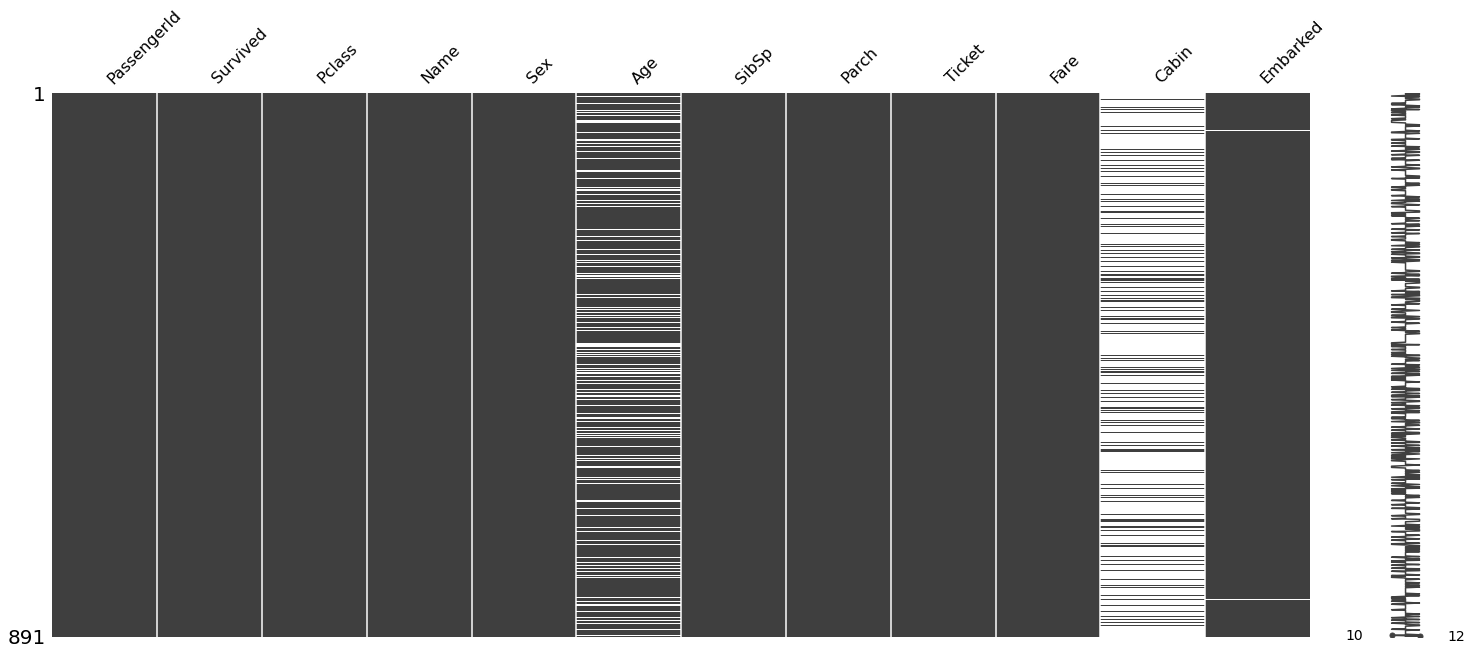

In [15]:

missingno.matrix(titan)

So far nothing much further insights to be glean from the describe table.

The missingno matrix will help us understanding more about missing data in our titan dataset.

Will proceed to find correlation among the numerical data.

In [16]:
Titan_num = titan[titan.describe().columns]
Titan_num.head(50)

PassengerId  Survived  Pclass   Age  SibSp  Parch      Fare
0             1         0       3  22.0      1      0    7.2500
1             2         1       1  38.0      1      0   71.2833
2             3         1       3  26.0      0      0    7.9250
3             4         1       1  35.0      1      0   53.1000
4             5         0       3  35.0      0      0    8.0500
5             6         0       3   NaN      0      0    8.4583
6             7         0       1  54.0      0      0   51.8625
7             8         0       3   2.0      3      1   21.0750
8             9         1       3  27.0      0      2   11.1333
9            10         1       2  14.0      1      0   30.0708
10           11         1       3   4.0      1      1   16.7000
11           12         1       1  58.0      0      0   26.5500
12           13         0       3  20.0      0      0    8.0500
13           14         0       3  39.0      1      5   31.2750
14           15         0       3  14.0      0      0    7.8542
15           16         1       2  55.0      0      0   16.0000
16           17         0       3   2.0      4      1   29.1250
17           18         1       2   NaN      0      0   13.0000
18           19         0       3  31.0      1      0   18.0000
19           20         1       3   NaN      0      0    7.2250
20           21         0       2  35.0      0      0   26.0000
21           22         1       2  34.0      0      0   13.0000
22           23         1       3  15.0      0      0    8.0292
23           24         1       1  28.0      0      0   35.5000
24           25         0       3   8.0      3      1   21.0750
25           26         1       3  38.0      1      5   31.3875
26           27         0       3   NaN      0      0    7.2250
27           28         0       1  19.0      3      2  263.0000
28           29         1       3   NaN      0      0    7.8792
29           30         0       3   NaN      0      0    7.8958
30           31         0       1  40.0      0      0   27.7208
31           32         1       1   NaN      1      0  146.5208
32           33         1       3   NaN      0      0    7.7500
33           34         0       2  66.0      0      0   10.5000
34           35         0       1  28.0      1      0   82.1708
35           36         0       1  42.0      1      0   52.0000
36           37         1       3   NaN      0      0    7.2292
37           38         0       3  21.0      0      0    8.0500
38           39         0       3  18.0      2      0   18.0000
39           40         1       3  14.0      1      0   11.2417
40           41         0       3  40.0      1      0    9.4750
41           42         0       2  27.0      1      0   21.0000
42           43         0       3   NaN      0      0    7.8958
43           44         1       2   3.0      1      2   41.5792
44           45         1       3  19.0      0      0    7.8792
45           46         0       3   NaN      0      0    8.0500
46           47         0       3   NaN      1      0   15.5000
47           48         1       3   NaN      0      0    7.7500
48           49         0       3   NaN      2      0   21.6792
49           50         0       3  18.0      1      0   17.8000

In [17]:
Titan_num.corr() 

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

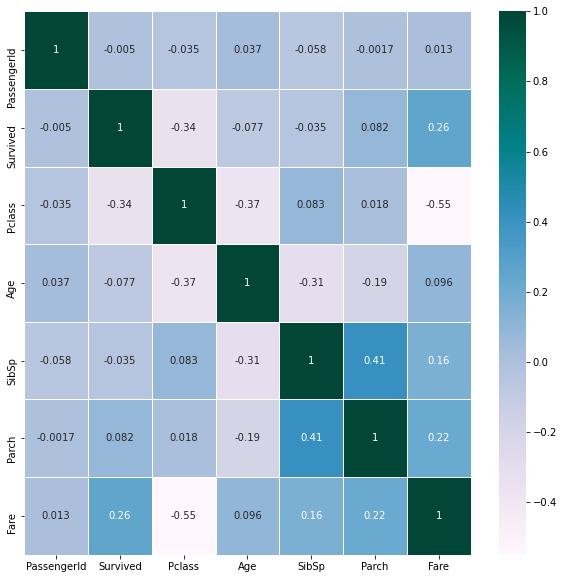

In [18]:
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(Titan_num.corr(),cmap='PuBuGn',annot=True,linewidth =0.7)
    # plt.figure(figsize=(20,20))
    plt.show()

In [19]:
Titan_num.corr().hvplot.heatmap(colorbar=True,fontscale = 1.2,frame_width =550,frame_height =550,cmap='magma')

:HeatMap   [columns,index]   (value)

In [20]:
import plotly.express as px
px.imshow(Titan_num.corr())

In [21]:
# Convert 'Survived' columns into string for classification in parallel plot
Titan_num['Survived'] = Titan_num['Survived'].apply(str)
#hvplot.parallel_coordinates(Titan_num,'Survived')
Titan_num.dtypes

<ipython-input-21-c66012c1dac5>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



PassengerId      int64
Survived        object
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [22]:
#hvplot.parallel_coordinates(Titan_num,'Survived',frame_width =550,frame_height =550)

In [23]:
import plotly.express as px
Titan_num = titan[titan.describe().columns] #convert 'Survived' back to int
fig=px.parallel_coordinates(Titan_num,color="Survived",color_continuous_scale=["red","blue"])
fig.show()

#### Did not find any useful insights from the correlation and parallel plot graphs 
- No direct correlation nor meaningful correlations between the numerical features
- No clear distinct clusters appear between features in the parallel plot

### Examine feature: PCLASS

In [24]:
Lived = titan[survivors]
Lived

PassengerId  Survived  Pclass  \
1              2         1       1   
2              3         1       3   
3              4         1       1   
8              9         1       3   
9             10         1       2   
..           ...       ...     ...   
875          876         1       3   
879          880         1       1   
880          881         1       2   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
..                                                 ...     ...   ...    ...   
875                   Najib, Miss. Adele Kiamie "Jane"  female  15.0      0   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  female  56.0      0   
880       Shelley, Mrs. William (Imanita Parrish Hall)  female  25.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
889                              Behr, Mr. Karl Howell    male  26.0      0   

     Parch            Ticket     Fare Cabin Embarked  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
8        2            347742  11.1333   NaN        S  
9        0            237736  30.0708   NaN        C  
..     ...               ...      ...   ...      ...  
875      0              2667   7.2250   NaN        C  
879      1             11767  83.1583   C50        C  
880      1            230433  26.0000   NaN        S  
887      0            112053  30.0000   B42        S  
889      0            111369  30.0000  C148        C  

[342 rows x 12 columns]

In [25]:
perished = titan['Survived'] == 0
Dead = titan[perished]
Dead.head()

PassengerId  Survived  Pclass                            Name   Sex   Age  \
0            1         0       3         Braund, Mr. Owen Harris  male  22.0   
4            5         0       3        Allen, Mr. William Henry  male  35.0   
5            6         0       3                Moran, Mr. James  male   NaN   
6            7         0       1         McCarthy, Mr. Timothy J  male  54.0   
7            8         0       3  Palsson, Master. Gosta Leonard  male   2.0   

   SibSp  Parch     Ticket     Fare Cabin Embarked  
0      1      0  A/5 21171   7.2500   NaN        S  
4      0      0     373450   8.0500   NaN        S  
5      0      0     330877   8.4583   NaN        Q  
6      0      0      17463  51.8625   E46        S  
7      3      1     349909  21.0750   NaN        S

#### Dataset Titan for all passenger 
#### Dataset Dead for all dead passengers
#### Dataset Lived for all survived passengers

In [26]:
# Select Pclass for examination
pclassview = titan[['PassengerId','Pclass']]
pclassview

PassengerId  Pclass
0              1       3
1              2       1
2              3       3
3              4       1
4              5       3
..           ...     ...
886          887       2
887          888       1
888          889       3
889          890       1
890          891       3

[891 rows x 2 columns]

In [27]:
# Visualize the distribution of passengers among the 3 classes
pclassview.hvplot()
pclassview.hvplot.bar(x='Pclass', y='PassengerId', rot=90)
pclassview.hvplot.hist(y ='Pclass')


:Histogram   [Pclass]   (Pclass_count)

In [28]:
px.histogram(pclassview, x ='Pclass',color="Pclass").update_layout(bargap=0.2)

In [30]:
# visualize the number of dead passengers among the 3 classes
Dead.hvplot.hist(y = 'Pclass')

:Histogram   [Pclass]   (Pclass_count)

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

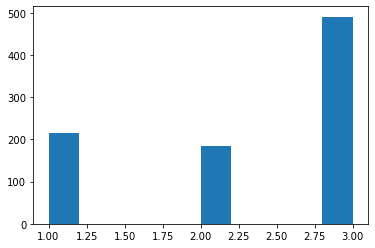

In [31]:
import matplotlib.pyplot as plt
plt.hist(titan['Pclass'])


In [32]:
# compare the livng and dead among the 3 classes
surbypclass = titan.groupby(['Pclass','Survived']).agg({'PassengerId':'count'})

In [33]:
surbypclass

PassengerId
Pclass Survived             
1      0                  80
       1                 136
2      0                  97
       1                  87
3      0                 372
       1                 119

In [34]:
titan.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()

Pclass  Parch  SibSp
1       0      0         31.00000
               1         76.72920
               2         90.00000
        1      0         77.28750
               1         81.40415
        2      0         81.85830
               1        120.00000
               2        262.37500
               3        263.00000
        4      1        263.00000
2       0      0         13.00000
               1         26.00000
               2         73.50000
               3         21.00000
        1      0         24.50000
               1         26.25000
               2         33.00000
        2      0         26.12500
               1         41.57920
        3      1         23.00000
               2         18.75000
3       0      0          7.89580
               1         15.00000
               2         18.00000
               3         15.85000
        1      0         12.47500
               1         15.50000
               2         19.25830
               3         25

### Parallel Bar Chart 

In [35]:
titan.groupby(['Pclass','Survived']).agg({'PassengerId':'count'}).hvplot.bar()

:Bars   [Pclass,Survived]   (PassengerId)

In [36]:
surbypclass2 = titan.pivot_table(index = 'Pclass',columns= 'Survived',values = 'PassengerId',aggfunc = 'count')
px.bar(surbypclass2,barmode="group")

Above parallel bar plot to visualize the difference in number of survivor and casualties in each class.

###  Stacked Bar Chart

In [37]:
titan.groupby(['Pclass','Survived']).agg({'PassengerId':'count'}).hvplot.bar(stacked = True)

:Bars   [Pclass,Survived]   (PassengerId)

In [38]:
surbypclass2 = titan.pivot_table(index = 'Pclass',columns= 'Survived',values = 'PassengerId',aggfunc = 'count')
px.bar(surbypclass2,barmode="stack",)

In [39]:
surbypclass = titan.pivot_table(index = 'Survived', columns = 'Pclass', values = 'PassengerId',aggfunc = 'count')
surbypclass

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

In [40]:
surbypclass.loc['Sum',:] = surbypclass[:].sum()
surbypclass

Pclass        1      2      3
Survived                     
0          80.0   97.0  372.0
1         136.0   87.0  119.0
Sum       216.0  184.0  491.0

In [41]:
#surbypclass[:].sum() - sum of respective class passengers
#surbypclass.iloc[1]  - respective class survivors
PclassSurvival_Rate= surbypclass.iloc[1]/surbypclass[:2].sum()
print(PclassSurvival_Rate)

Pclass
1    0.629630
2    0.472826
3    0.242363
dtype: float64


The bar plots show that the cabin classes feature has a signifcant influence on the rate of survival. 
- class 3 has the most passengers by far out of all the classes however the no of survivor is low.
- comparatively class 1 and 2 has a higher percentage of survivors compare to class 3.
- class 1 clearly has most survivors out of all the three classes

### Examine Feature : Age

In [42]:
titan.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

Looking at the table we can see that we have quite abit of missing data here in the age column


In [43]:
No_of_missing_age_data = len(titan['Age'])-titan.describe()['Age'][0]
No_of_missing_age_data

177.0

So we are looking at 177 missing age from column 'Age'.

### Histogram to check on distribution of passengers across the various age band

In [44]:
titan.Age.hvplot.hist()

:Histogram   [Age]   (Age_count)

### Pivot the info to view number of passengers survived or died across each age

In [45]:
SurByAge = titan.pivot_table(index = 'Survived', columns = 'Age', values = 'PassengerId', aggfunc = 'count')
SurByAge

Age       0.42   0.67   0.75   0.83   0.92   1.00   2.00   3.00   4.00   \
Survived                                                                  
0           NaN    NaN    NaN    NaN    NaN    2.0    7.0    1.0    3.0   
1           1.0    1.0    2.0    2.0    1.0    5.0    3.0    5.0    7.0   

Age       5.00   ...  62.00  63.00  64.00  65.00  66.00  70.00  70.50  71.00  \
Survived         ...                                                           
0           NaN  ...    2.0    NaN    2.0    3.0    1.0    2.0    1.0    2.0   
1           4.0  ...    2.0    2.0    NaN    NaN    NaN    NaN    NaN    NaN   

Age       74.00  80.00  
Survived                
0           1.0    NaN  
1           NaN    1.0  

[2 rows x 88 columns]

### Plot out with bar chart

In [46]:
SurByAge.hvplot.bar( aggregator = 'count')
#hvplot.help('hist')

:Bars   [Survived,Age]   (value)

In [47]:
SurByAge2 = titan.pivot_table(index = 'Age', columns = 'Survived', values = 'PassengerId', aggfunc = 'count')
SurByAge2
SurByAge2.hvplot.bar(aggregator = 'mean')

:Bars   [Age,Survived]   (value)

### Plot out with parallel bar to compare 'survived' with 'died ' side by side

In [48]:
titan.groupby(['Age','Survived']).agg({'PassengerId':'count'}).hvplot.bar()

:Bars   [Age,Survived]   (PassengerId)

### Bar chart with only living across the various ages

In [49]:
Lived.groupby(['Age','Survived']).agg({'PassengerId':'count'}).hvplot.bar()

:Bars   [Age,Survived]   (PassengerId)

### Bar chart showing the dead across the various ages

In [50]:
Dead.groupby(['Age','Survived']).agg({'PassengerId':'count'}).hvplot.bar()

:Bars   [Age,Survived]   (PassengerId)

### Check for any patterns or clusters using the scatterplot chart

In [51]:
px.scatter(titan,x='Age', y='PassengerId',color = 'Survived',height=800, width=800)

In [52]:
#SurByAge = titan.pivot_table(index = 'Survived', columns = 'Age', values = 'PassengerId', aggfunc = 'count')
titan.hvplot.scatter(x='Age', y='PassengerId', by='Survived', legend='top', height=600, width=600)

:NdOverlay   [Survived]
   :Scatter   [Age]   (PassengerId)

In [53]:
AgesetSur = titan[['Age','Survived','Parch']]
AgesetSur2 = AgesetSur.dropna(subset=['Age'])
AgesetSur2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Survived  714 non-null    int64  
 2   Parch     714 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 22.3 KB


In [54]:
cluster = KMeans(n_clusters = 3, init = 'k-means++')
cluster.fit(AgesetSur2)

KMeans(n_clusters=3)

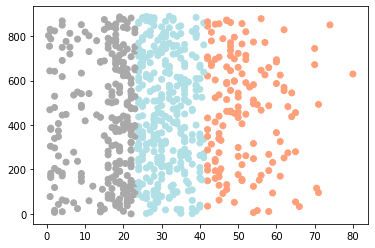

In [55]:
color_theme = np.array(['darkgray','lightsalmon','powderblue'])
plt.scatter( x = AgesetSur2.Age, y = AgesetSur2.index, c = color_theme[cluster.labels_])

<AxesSubplot:xlabel='Age'>

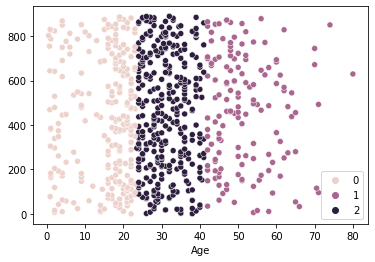

In [56]:
sns.scatterplot(x = AgesetSur2.Age, y = AgesetSur2.index,hue = cluster.labels_ )

In [57]:
import sklearn.cluster as cluster

k = cluster.KMeans(n_clusters = 3, init = 'k-means++')
k= k.fit(AgesetSur2)

In [58]:
k.cluster_centers_

array([[30.5761194 ,  0.40895522,  0.31940299],
       [51.20945946,  0.37162162,  0.36486486],
       [14.64575758,  0.42424242,  0.63636364]])

In [59]:
AgesetSur2['cluster']= k.labels_

<ipython-input-59-38f43f80aa4b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [60]:
AgesetSur2.head()

Age  Survived  Parch  cluster
0  22.0         0      0        2
1  38.0         1      0        0
2  26.0         1      0        0
3  35.0         1      0        0
4  35.0         0      0        0

In [61]:
AgesetSur2.cluster.value_counts()

0    335
2    231
1    148
Name: cluster, dtype: int64

<AxesSubplot:xlabel='Age'>

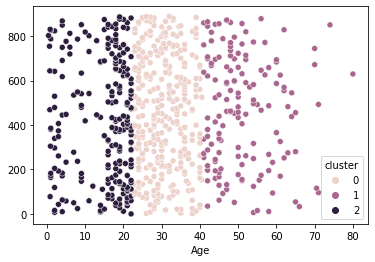

In [62]:
sns.scatterplot(x = AgesetSur2.Age, y = AgesetSur2.index,hue = 'cluster',data= AgesetSur2 )

In [63]:
from sklearn import neighbors
x = AgesetSur2[['Age','Parch']]
y = AgesetSur2['Survived']
k2 = neighbors.KNeighborsClassifier(n_neighbors=3)
k2 = k2.fit(x,y)

In [64]:
predict = k2.predict(x)

In [65]:
predict

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,

In [66]:
AgesetSur2['knn']=predict

<ipython-input-66-fbea2e2064a2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [67]:
AgesetSur2

Age  Survived  Parch  cluster  knn
0    22.0         0      0        2    0
1    38.0         1      0        0    1
2    26.0         1      0        0    1
3    35.0         1      0        0    1
4    35.0         0      0        0    1
..    ...       ...    ...      ...  ...
885  39.0         0      5        0    0
886  27.0         0      0        0    0
887  19.0         1      0        2    1
889  26.0         1      0        0    1
890  32.0         0      0        0    1

[714 rows x 5 columns]

<AxesSubplot:xlabel='Age'>

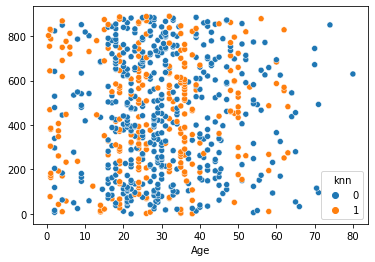

In [68]:
sns.scatterplot(x = AgesetSur2.Age, y = AgesetSur2.index,hue = 'knn',data= AgesetSur2 )

In [69]:
masters = [i.split(',')[1].split('.')[0].strip()=='Master' for i in titan.Name.values]


In [70]:
titan[masters]

PassengerId  Survived  Pclass  \
7              8         0       3   
16            17         0       3   
50            51         0       3   
59            60         0       3   
63            64         0       3   
65            66         1       3   
78            79         1       2   
125          126         1       3   
159          160         0       3   
164          165         0       3   
165          166         1       3   
171          172         0       3   
176          177         0       3   
182          183         0       3   
183          184         1       2   
193          194         1       2   
261          262         1       3   
278          279         0       3   
305          306         1       1   
340          341         1       2   
348          349         1       3   
386          387         0       3   
407          408         1       2   
445          446         1       1   
480          481         0       3   
489          490         1       3   
549          550         1       2   
709          710         1       3   
751          752         1       3   
755          756         1       2   
787          788         0       3   
788          789         1       3   
802          803         1       1   
803          804         1       3   
819          820         0       3   
824          825         0       3   
827          828         1       2   
831          832         1       2   
850          851         0       3   
869          870         1       3   

                                                  Name   Sex    Age  SibSp  \
7                       Palsson, Master. Gosta Leonard  male   2.00      3   
16                                Rice, Master. Eugene  male   2.00      4   
50                          Panula, Master. Juha Niilo  male   7.00      4   
59                  Goodwin, Master. William Frederick  male  11.00      5   
63                               Skoog, Master. Harald  male   4.00      3   
65                            Moubarek, Master. Gerios  male    NaN      1   
78                       Caldwell, Master. Alden Gates  male   0.83      0   
125                       Nicola-Yarred, Master. Elias  male  12.00      1   
159                         Sage, Master. Thomas Henry  male    NaN      8   
164                       Panula, Master. Eino Viljami  male   1.00      4   
165    Goldsmith, Master. Frank John William "Frankie"  male   9.00      0   
171                               Rice, Master. Arthur  male   4.00      4   
176                      Lefebre, Master. Henry Forbes  male    NaN      3   
182              Asplund, Master. Clarence Gustaf Hugo  male   9.00      4   
183                          Becker, Master. Richard F  male   1.00      2   
193                         Navratil, Master. Michel M  male   3.00      1   
261                  Asplund, Master. Edvin Rojj Felix  male   3.00      4   
278                                 Rice, Master. Eric  male   7.00      4   
305                     Allison, Master. Hudson Trevor  male   0.92      1   
340                     Navratil, Master. Edmond Roger  male   2.00      1   
348             Coutts, Master. William Loch "William"  male   3.00      1   
386                    Goodwin, Master. Sidney Leonard  male   1.00      5   
407                     Richards, Master. William Rowe  male   3.00      1   
445                          Dodge, Master. Washington  male   4.00      0   
480                     Goodwin, Master. Harold Victor  male   9.00      5   
489              Coutts, Master. Eden Leslie "Neville"  male   9.00      1   
549                     Davies, Master. John Morgan Jr  male   8.00      1   
709  Moubarek, Master. Halim Gonios ("William George")  male    NaN      1   
751                                Moor, Master. Meier  male   6.00      0   
755                          Hamalainen, Master. Viljo  male   0.67      1   
787                         

In [71]:
titan[masters].Age.max()

12.0

####  The oldest age to be addressed as 'Master' in this training dataset is 12. A check on the test set shows this to be 13.


### Summarize on Age Feature
- the various charts does not present any further insights though it seems that children of very young age tend to survive
- no clear pattern as to how age might contribute to survivor rate 
- there are quite alot of missing data as well . 177 empty cells

#### Wiki: Reading up on wiki 
- states that women and children are prioritized in getting in the lifeboats.
- will look at feature creation from age . Separating into children and adults.
- As people in that era are expected to be adults in a much younger age. 
- I will  classify children as passengers who are 13 or younger .
- For the 177 missing data . I will derive those who travel by with 0 parch as adults 
- For those those are with parch will be examined further else be classified as children




### Examine Feature :Name

In [72]:
titan.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

#### Name and Titles 
- based on feature examination Sex . Found that women are more likely to survived . 
- However among women are singles or married women are more likely survivors.
- Be interesting to have Miss and Mrs titles as features.
- Master is a title for young male that are still not of age . Will that have any impact on the data.
- Break down the types of titles and examine further

In [73]:
title =[ i.split(',')[1].split('.')[0].strip() for i in titan.Name ]


In [74]:
titan['title'] =[ i.split(',')[1].split('.')[0].strip() for i in titan.loc[:,'Name']]
titan.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked title  
0      0         A/5 21171   7.2500   NaN        S    Mr  
1      0          PC 17599  71.2833   C85        C   Mrs  
2      0  STON/O2. 3101282   7.9250   NaN        S  Miss  
3      0            113803  53.1000  C123        S   Mrs  
4      0            373450   8.0500   NaN        S    Mr

In [75]:
titan['title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Ms                1
Sir               1
the Countess      1
Capt              1
Jonkheer          1
Mme               1
Lady              1
Don               1
Name: title, dtype: int64

In [76]:
Surbytitle = titan.pivot_table(index = 'Survived', columns = 'title' , values = 'PassengerId', aggfunc = 'count')
Surbytitle

title     Capt  Col  Don   Dr  Jonkheer  Lady  Major  Master   Miss  Mlle  \
Survived                                                                    
0          1.0  1.0  1.0  4.0       1.0   NaN    1.0    17.0   55.0   NaN   
1          NaN  1.0  NaN  3.0       NaN   1.0    1.0    23.0  127.0   2.0   

title     Mme     Mr   Mrs   Ms  Rev  Sir  the Countess  
Survived                                                 
0         NaN  436.0  26.0  NaN  6.0  NaN           NaN  
1         1.0   81.0  99.0  1.0  NaN  1.0           1.0

In [77]:
#.filna(0) to replace all NaN as 0
Titlesurvival_rate = Surbytitle.iloc[1].fillna(0)/Surbytitle.sum()
Titlesurvival_rate.sort_values( ascending=False)


title
the Countess    1.000000
Mlle            1.000000
Sir             1.000000
Ms              1.000000
Lady            1.000000
Mme             1.000000
Mrs             0.792000
Miss            0.697802
Master          0.575000
Col             0.500000
Major           0.500000
Dr              0.428571
Mr              0.156673
Jonkheer        0.000000
Rev             0.000000
Don             0.000000
Capt            0.000000
dtype: float64

**It would seem that from the data**
- Mrs holds the highest survival rate follow by Miss and Master 
- Mrs are definitely adults 
- Miss and Master consist of children and young adults
- Will look at adding Mr, Mrs,Miss and Master to features
- Rev seems to have all perished. Might add Rev as feature as well 

So planned new feature :

**child, adult**

**Mr, Mrs, Miss, Master, Rev**

In [78]:
titan.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked title  
0      0         A/5 21171   7.2500   NaN        S    Mr  
1      0          PC 17599  71.2833   C85        C   Mrs  
2      0  STON/O2. 3101282   7.9250   NaN        S  Miss  
3      0            113803  53.1000  C123        S   Mrs  
4      0            373450   8.0500   NaN        S    Mr

### Examine Feature : SibSp and Parch

In [79]:
titan.SibSp.hvplot.hist()

:Histogram   [SibSp]   (SibSp_count)

In [80]:
titan.Parch.hvplot.hist()

:Histogram   [Parch]   (Parch_count)

In [81]:
titan.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [82]:
titan.Parch.value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

**-  lets look at the survival rates of SibSp and Parch**

### Plot SibSp

In [83]:
SurbySibSp = titan.pivot_table(index = 'Survived' , columns = 'SibSp', values = 'PassengerId', aggfunc= 'count')
SurbySibSp


SibSp         0      1     2     3     4    5    8
Survived                                          
0         398.0   97.0  15.0  12.0  15.0  5.0  7.0
1         210.0  112.0  13.0   4.0   3.0  NaN  NaN

In [84]:
SurbySibSp.hvplot.hist()

:NdOverlay   [Element]
   :Histogram   [8]   (8_count)

In [85]:
SurbySibSp2 = titan.pivot_table(index = 'SibSp' , columns = 'Survived', values = 'PassengerId', aggfunc= 'count')
SurbySibSp2

Survived      0      1
SibSp                 
0         398.0  210.0
1          97.0  112.0
2          15.0   13.0
3          12.0    4.0
4          15.0    3.0
5           5.0    NaN
8           7.0    NaN

In [86]:
SurbySibSp2.hvplot.bar()

:Bars   [SibSp,Survived]   (value)

In [87]:
SurbySibSp2.hvplot.bar(stacked= True)

:Bars   [SibSp,Survived]   (value)

In [88]:
px.bar(SurbySibSp2, barmode = 'group')

In [89]:
px.bar(SurbySibSp2, barmode = 'stack')

#### Survival Rate of SibSp:

In [90]:
SurbySibSp_rate = SurbySibSp2.loc[:,1]/SurbySibSp2.loc[:].sum(axis=1)
SurbySibSp_rate 

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5         NaN
8         NaN
dtype: float64

Seems like survival rate increases when you have a couple of siblings or spoouse but falls as the family nucleus gets larger

### Plot Parch

In [91]:
SurbyParch = titan.pivot_table(index = 'Parch', columns = 'Survived', values = 'PassengerId', aggfunc = 'count')

In [92]:
SurbyParch

Survived      0      1
Parch                 
0         445.0  233.0
1          53.0   65.0
2          40.0   40.0
3           2.0    3.0
4           4.0    NaN
5           4.0    1.0
6           1.0    NaN

In [93]:
SurbyParch.hvplot.bar()

:Bars   [Parch,Survived]   (value)

In [94]:
SurbyParch.hvplot.bar( stacked = True)

:Bars   [Parch,Survived]   (value)

In [95]:
px.bar(SurbyParch,barmode ='group')

In [96]:
px.bar(SurbyParch,barmode ='stack')

In [97]:
SurbyParch_rate = SurbyParch.loc[:,1]/SurbyParch.loc[:].sum(axis=1)
SurbyParch_rate 

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4         NaN
5    0.200000
6         NaN
dtype: float64

### Compare Parch and SibSp

In [98]:
print(str(SurbySibSp_rate) + str(SurbyParch_rate))

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5         NaN
8         NaN
dtype: float64Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4         NaN
5    0.200000
6         NaN
dtype: float64


- So it seems that SibSp and Parch can help in determine survivor rates.
- As it seems having a companion or 2 helps in survival but not too many. 



### Examine Feature: Ticket

In [99]:
titan.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked title  
0      0         A/5 21171   7.2500   NaN        S    Mr  
1      0          PC 17599  71.2833   C85        C   Mrs  
2      0  STON/O2. 3101282   7.9250   NaN        S  Miss  
3      0            113803  53.1000  C123        S   Mrs  
4      0            373450   8.0500   NaN        S    Mr

#### Wiki info:
- according to wiki there are deck A to deck G .
- lower decks are mostly occupied by 3 class passengers 
- perhaps the numbering or alphabets of the ticket will tell which deck the passengers are at
- likelyhood that the top deck passengers are more likely to survive

In [100]:
ticket_letter = [i.split(' ')[0].replace('/','').replace('.','') if i.isnumeric()==False else eval(i)*0 for i in titan.Ticket]
#ticket_letter = [ eval(i)*0 if i.isnumeric() else i.split(' ')[0].replace('/','').replace('.','') for i in titan.Ticket]

In [297]:
ticket_letter = [i.lower().split(' ')[0].replace('/','').replace('.','') if i.isnumeric()==False else i.replace(i,'Numeric') for i in titan.Ticket]

In [298]:
ticket_letter

['a5',
 'pc',
 'stono2',
 'Numeric',
 'Numeric',
 'Numeric',
 'Numeric',
 'Numeric',
 'Numeric',
 'Numeric',
 'pp',
 'Numeric',
 'a5',
 'Numeric',
 'Numeric',
 'Numeric',
 'Numeric',
 'Numeric',
 'Numeric',
 'Numeric',
 'Numeric',
 'Numeric',
 'Numeric',
 'Numeric',
 'Numeric',
 'Numeric',
 'Numeric',
 'Numeric',
 'Numeric',
 'Numeric',
 'pc',
 'pc',
 'Numeric',
 'ca',
 'pc',
 'Numeric',
 'Numeric',
 'a5',
 'Numeric',
 'Numeric',
 'Numeric',
 'Numeric',
 'Numeric',
 'scparis',
 'Numeric',
 'sca4',
 'Numeric',
 'Numeric',
 'Numeric',
 'Numeric',
 'Numeric',
 'a4',
 'pc',
 'Numeric',
 'Numeric',
 'Numeric',
 'ca',
 'Numeric',
 'ca',
 'ca',
 'Numeric',
 'Numeric',
 'Numeric',
 'Numeric',
 'pc',
 'Numeric',
 'ca',
 'sp',
 'Numeric',
 'Numeric',
 'ca',
 'ca',
 'soc',
 'Numeric',
 'Numeric',
 'Numeric',
 'Numeric',
 'Numeric',
 'Numeric',
 'Numeric',
 'Numeric',
 'Numeric',
 'Numeric',
 'Numeric',
 'soc',
 'Numeric',
 'wc',
 'sotonoq',
 'Numeric',
 'Numeric',
 'Numeric',
 'Numeric',
 'wep',


In [336]:
#ticket_numeric 
ticket_numeric = [i if i.isnumeric() else i.split(' ')[-1] for i in titan.Ticket]
ticket_numeric

['21171',
 '17599',
 '3101282',
 '113803',
 '373450',
 '330877',
 '17463',
 '349909',
 '347742',
 '237736',
 '9549',
 '113783',
 '2151',
 '347082',
 '350406',
 '248706',
 '382652',
 '244373',
 '345763',
 '2649',
 '239865',
 '248698',
 '330923',
 '113788',
 '349909',
 '347077',
 '2631',
 '19950',
 '330959',
 '349216',
 '17601',
 '17569',
 '335677',
 '24579',
 '17604',
 '113789',
 '2677',
 '2152',
 '345764',
 '2651',
 '7546',
 '11668',
 '349253',
 '2123',
 '330958',
 '23567',
 '370371',
 '14311',
 '2662',
 '349237',
 '3101295',
 '39886',
 '17572',
 '2926',
 '113509',
 '19947',
 '31026',
 '2697',
 '34651',
 '2144',
 '2669',
 '113572',
 '36973',
 '347088',
 '17605',
 '2661',
 '29395',
 '3464',
 '3101281',
 '315151',
 '33111',
 '2144',
 '14879',
 '2680',
 '1601',
 '348123',
 '349208',
 '374746',
 '248738',
 '364516',
 '345767',
 '345779',
 '330932',
 '113059',
 '14885',
 '3101278',
 '6608',
 '392086',
 '19950',
 '343275',
 '343276',
 '347466',
 '5734',
 '2315',
 '364500',
 '374910',
 '17754

In [337]:
titan['ticket_letter'] = ticket_letter

In [338]:
titan['ticket_numeric'] = ticket_numeric

In [339]:
titan

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked title ticket_letter  \
0        0         A/5 21171   7.2500   NaN        S    Mr            a5   
1        0          PC 17599  71.2833   C85        C   Mrs            pc   
2        0  STON/O2. 3101282   7.9250   NaN        S  Miss        stono2   
3        0            113803  53.1000  C123        S   Mrs       Numeric   
4        0            373450   8.0500   NaN        S    Mr       Numeric   
..     ...               ...      ...   ...      ...   ...           ...   
886      0            211536  13.0000   NaN        S   Rev       Numeric   
887      0            112053  30.0000   B42        S  Miss       Numeric   
888      2        W./C. 6607  23.4500   NaN        S  Miss            wc   
889      0            111369  30.0000  C148        C    Mr       Numeric   
890      0            370376   7.7500   NaN        Q    Mr       Numeric   

    Maturity  CVData ticket_numeric  
0      Adult       0          21171  
1      Adult       0          17599  
2      Adult       0        3101282  
3      Adult       0         113803  
4      Adult       0         373450  
..       ...     ...            ...  
886    Adult       0         211536  
887    Adult       0         112053  
888    Child       0           6607  
889    Adult       0         111369  
890    Adult       0         370376  

[891 rows x 17 columns]

In [340]:
titan.ticket_letter.value_counts()

Numeric    661
pc          60
ca          41
a5          21
sotonoq     15
stono       12
scparis     11
wc          10
a4           7
soc          6
stono2       6
fcc          5
c            5
line         4
wep          3
sopp         3
scah         3
pp           3
sotono2      2
swpp         2
ppp          2
sca4         1
scow         1
sc           1
fa           1
sop          1
as           1
fc           1
casoton      1
sp           1
Name: ticket_letter, dtype: int64

#### Looking at the different ticket_letters
- it seems we can group certain letters together
    - stono and stono2 
    - sotonoq and sotono2
- we can examine togther with ticket_numerics and see if they follow the same numeric patterns

In [348]:
titan[(titan.ticket_letter == 'stono') | (titan.ticket_letter== 'stono2') | (titan.ticket_letter== 'sotonoq') | (titan.ticket_letter== 'sotono2')]

PassengerId  Survived  Pclass  \
2              3         1       3   
87            88         0       3   
115          116         0       3   
131          132         0       3   
142          143         1       3   
157          158         0       3   
173          174         0       3   
210          211         0       3   
216          217         1       3   
220          221         1       3   
243          244         0       3   
363          364         0       3   
382          383         0       3   
400          401         1       3   
403          404         0       3   
414          415         1       3   
429          430         1       3   
433          434         0       3   
465          466         0       3   
491          492         0       3   
511          512         0       3   
563          564         0       3   
564          565         0       3   
579          580         1       3   
590          591         0       3   
611          612         0       3   
636          637         0       3   
664          665         1       3   
729          730         0       3   
744          745         1       3   
761          762         0       3   
784          785         0       3   
816          817         0       3   
840          841         0       3   
884          885         0       3   

                                                  Name     Sex   Age  SibSp  \
2                               Heikkinen, Miss. Laina  female  26.0      0   
87                       Slocovski, Mr. Selman Francis    male   NaN      0   
115                              Pekoniemi, Mr. Edvard    male  21.0      0   
131                     Coelho, Mr. Domingos Fernandeo    male  20.0      0   
142  Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...  female  24.0      1   
157                                    Corn, Mr. Harry    male  30.0      0   
173                          Sivola, Mr. Antti Wilhelm    male  21.0      0   
210                                     Ali, Mr. Ahmed    male  24.0      0   
216                             Honkanen, Miss. Eliina  female  27.0      0   
220                     Sunderland, Mr. Victor Francis    male  16.0      0   
243                      Maenpaa, Mr. Matti Alexanteri    male  22.0      0   
363                                    Asim, Mr. Adola    male  35.0      0   
382                                 Tikkanen, Mr. Juho    male  32.0      0   
400                                 Niskanen, Mr. Juha    male  39.0      0   
403                     Hakkarainen, Mr. Pekka Pietari    male  28.0      1   
414                          Sundman, Mr. Johan Julian    male  44.0      0   
429                 Pickard, Mr. Berk (Berk Trembisky)    male  32.0      0   
433                         Kallio, Mr. Nikolai Erland    male  17.0      0   
465                    Goncalves, Mr. Manuel Estanslas    male  38.0      0   
491                                Windelov, Mr. Einar    male  21.0      0   
511                                  Webber, Mr. James    male   NaN      0   
563                                  Simmons, Mr. John    male   NaN      0   
564                     Meanwell, Miss. (Marion Ogden)  female   NaN      0   
579                                Jussila, Mr. Eiriik    male  32.0      0   
590                               Rintamaki, Mr. Matti    male  35.0      0   
611                              Jardin, Mr. Jose Neto    male   NaN      0   
636                         Leinonen, Mr. Antti Gustaf    male  32.0      0   
664                        Lindqvist, Mr. Eino William    male  20.0      1   
729                      Ilmakangas, Miss. Pieta Sofia  female  25.0      1   
744                                 Stranden, Mr. Juho    male  31.0      0   
761                     Nirva, Mr. Iisakki Antino Aijo    male  41.0      0   
784                                   Ali, Mr. William    male  25.0      0   
816                       Hei

In [349]:
titan[(titan.ticket_letter == 'stono') | (titan.ticket_letter== 'stono2') | (titan.ticket_letter== 'sotonoq') | (titan.ticket_letter== 'sotono2')].count()

PassengerId       35
Survived          35
Pclass            35
Name              35
Sex               35
Age               30
SibSp             35
Parch             35
Ticket            35
Fare              35
Cabin              1
Embarked          35
title             35
ticket_letter     35
Maturity          35
CVData            35
ticket_numeric    35
dtype: int64

**- Total is 35.**

**- Its seems that stono, stono2 , sotono2  follow the same numeric pattern : 310 for the first 3 digitout of 7 digits**

**- sotonq is slightly different with some tickets**        
    
    1. starting at 392 for first 3 digits out of 6 digits and    
    2. some at 31013 out of 7 digits


**- I will group the stono, stono2 and sotono2 togther as stono**

**- I will group numeric tickets with 31012 for first 5 digits as stono**

**- We can infer from the digital patterns of  other numeric tickets , the ticket_letter that they might belong to**



In [386]:
# REPLACE stono, stono2 and sotono2
# to replace value always use loc(filter,'columns)')
titan.loc[(titan.ticket_letter == 'stono') | (titan.ticket_letter== 'stono2')  | (titan.ticket_letter== 'sotono2'),'ticket_letter'] = 'stono'

#find all ticket_numeric start with 31012 and replace with stono on the ticket_letter
titan.loc[titan.ticket_numeric.str.slice(0,5)=='31012','ticket_letter'] = 'stono'

#find all ticket_numeric start with 170 and replace with pc on ticket_letter
titan.loc[titan.ticket_numeric.str.slice(0,5)=='17','ticket_letter'] = 'pc'

In [396]:
titan.loc[titan.ticket_numeric.str.slice(0,2)=='17','ticket_letter']

1           pc
6      Numeric
30          pc
31          pc
34          pc
52          pc
64          pc
96          pc
97          pc
118         pc
127          c
139         pc
155         pc
168         pc
174    Numeric
177         pc
194         pc
195         pc
256         pc
258         pc
265         ca
268         pc
269         pc
273         pc
295         pc
299         pc
306    Numeric
307         pc
309         pc
311         pc
325         pc
332         pc
334         pc
369         pc
373         pc
375         pc
380         pc
389         sc
453    Numeric
457    Numeric
493         pc
505         pc
512         pc
513         pc
527         pc
537         pc
544         pc
550    Numeric
557         pc
572         pc
581    Numeric
599         pc
609         pc
641         pc
645         pc
660         pc
679         pc
681         pc
690    Numeric
698    Numeric
700         pc
701         pc
707         pc
710         pc
716         pc
737         pc
742       

In [350]:
Surbyticket_letter = titan.pivot_table( index = 'ticket_letter', columns = 'Survived', values = 'PassengerId', aggfunc = 'count')

In [351]:
Surbyticket_letter.sort_values(by = 1,ascending = False)

Survived           0      1
ticket_letter              
Numeric        407.0  254.0
pc              21.0   39.0
ca              27.0   14.0
stono            7.0    5.0
scparis          6.0    5.0
fcc              1.0    4.0
stono2           3.0    3.0
c                3.0    2.0
pp               1.0    2.0
swpp             NaN    2.0
a5              19.0    2.0
scah             1.0    2.0
sotonoq         13.0    2.0
wc               9.0    1.0
sc               NaN    1.0
soc              5.0    1.0
ppp              1.0    1.0
line             3.0    1.0
wep              2.0    1.0
a4               7.0    NaN
as               1.0    NaN
casoton          1.0    NaN
fa               1.0    NaN
fc               1.0    NaN
sca4             1.0    NaN
scow             1.0    NaN
sop              1.0    NaN
sopp             3.0    NaN
sotono2          2.0    NaN
sp               1.0    NaN

In [352]:
Surbyticket_letter_rate = Surbyticket_letter.loc[:,1]/Surbyticket_letter.sum(axis=1)
Surbyticket_letter_rate.sort_values(ascending=False)


ticket_letter
sc         1.000000
swpp       1.000000
fcc        0.800000
pp         0.666667
scah       0.666667
pc         0.650000
stono2     0.500000
ppp        0.500000
scparis    0.454545
stono      0.416667
c          0.400000
Numeric    0.384266
ca         0.341463
wep        0.333333
line       0.250000
soc        0.166667
sotonoq    0.133333
wc         0.100000
a5         0.095238
a4              NaN
as              NaN
casoton         NaN
fa              NaN
fc              NaN
sca4            NaN
scow            NaN
sop             NaN
sopp            NaN
sotono2         NaN
sp              NaN
dtype: float64

#### Summarize on Ticket letter
- PC, C.A. seems more likely to survive
- A5, CA, CA. and SOTONOQ ,WC,A4 seems quite lilkely to perish
- PC ,A5, CA , SOTONOQ,WC,A4,C.A., CA. as new features 

### Examine Feature: Embarked

In [109]:
titan.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked title ticket_letter  
0      0         A/5 21171   7.2500   NaN        S    Mr            A5  
1      0          PC 17599  71.2833   C85        C   Mrs            PC  
2      0  STON/O2. 3101282   7.9250   NaN        S  Miss        STONO2  
3      0            113803  53.1000  C123        S   Mrs       Numeric  
4      0            373450   8.0500   NaN        S    Mr       Numeric

In [110]:
titan.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [111]:
titan.Embarked.value_counts().hvplot.bar(color = 'red')

:Bars   [index]   (Embarked)

In [112]:
titan[['Embarked']].value_counts().hvplot.bar()

:Bars   [Embarked]   (0)

In [113]:
px.bar(titan.Embarked.value_counts(),color = [4,2,9])

In [114]:
titan[['Embarked']]

Embarked
0          S
1          C
2          S
3          S
4          S
..       ...
886        S
887        S
888        S
889        C
890        Q

[891 rows x 1 columns]

In [115]:
px.bar(titan[['Embarked']])

In [116]:
px.bar( x = titan.Embarked.value_counts().index, y =titan.Embarked.value_counts(), color =  titan.Embarked.value_counts().index)

In [117]:
# Percentage of of passengers from each city
titan.Embarked.value_counts()/titan.Embarked.value_counts().sum()

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [118]:
SurbyEmbarked = titan.pivot_table( index = 'Embarked', columns = 'Survived', values = 'PassengerId', aggfunc= 'count')

In [119]:
SurbyEmbarked

Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217

In [120]:
SurbyEmbarked = SurbyEmbarked.loc[:,1]/SurbyEmbarked.sum(axis= 1)

In [121]:
SurbyEmbarked

Embarked
C    0.553571
Q    0.389610
S    0.336957
dtype: float64

#### It would seem that passengers from Cherbourg have a higher chance of survival 

In [122]:
titan.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked title ticket_letter  
0      0         A/5 21171   7.2500   NaN        S    Mr            A5  
1      0          PC 17599  71.2833   C85        C   Mrs            PC  
2      0  STON/O2. 3101282   7.9250   NaN        S  Miss        STONO2  
3      0            113803  53.1000  C123        S   Mrs       Numeric  
4      0            373450   8.0500   NaN        S    Mr       Numeric

In [123]:
Titan_num.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500

##  Feature Creation
- Create child and adult feature:
    1. adults are age 14 and above
    2. children are age 13 and below
    
    - For NaN , if Parch = 0 set as adult or Title = Mr or Mrs.
    - if Title = Master or Miss set as child


- Create tites feature 
    1. Mr
    2. Mrs
    3. Master
    4. Miss
    5. Rev


- Create ticket_letter features
    1. PC
    2. A4
    3. A5 
    4. CA
    5. SOTONOQ
    6. WC
   
   
- Sex change into 
     1. Female
     2. Male
   
   
- Pclass change into
     1. Class 1
     2. Class 2
     3. Class 3
     
     
- Embarked change into 
     1. C
     2. S
     3. 3
     4. N which is NaN


- Remove : 
    1. Sex
    2. Names
    3. PassengerId
    4. Ticket
    5. Fare
    6. cabin
    
    
- Replace NaN in
    1. Age


In [124]:
titan2 = titan.copy()
titan2

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked title ticket_letter  
0        0         A/5 21171   7.2500   NaN        S    Mr            A5  
1        0          PC 17599  71.2833   C85        C   Mrs            PC  
2        0  STON/O2. 3101282   7.9250   NaN        S  Miss        STONO2  
3        0            113803  53.1000  C123        S   Mrs       Numeric  
4        0            373450   8.0500   NaN        S    Mr       Numeric  
..     ...               ...      ...   ...      ...   ...           ...  
886      0            211536  13.0000   NaN        S   Rev       Numeric  
887      0            112053  30.0000   B42        S  Miss       Numeric  
888      2        W./C. 6607  23.4500   NaN        S  Miss            WC  
889      0            111369  30.0000  C148        C    Mr       Numeric  
890      0            370376   7.7500   NaN        Q    Mr       Numeric  

[891 rows x 14 columns]

# STOP STOP STOP

##### Example 1 using function

In [125]:
def adults_child(x):
    x = str(x)
    
    if eval(x) >= 14:
        x = x.replace(x,'adult')
        #or simply just : return 'adult'
    else:
        x= x.replace(x,'child') 
        #return 'child'
    return x   

In [126]:
titan2['Adults_child'] = titan2.Age.apply(lambda x:0 if pd.isna(x) else adults_child(x))
titan2.head(50)

PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   
20           21         0       2   
21           22         1       2   
22           23         1       3   
23           24         1       1   
24           25         0       3   
25           26         1       3   
26           27         0       3   
27           28         0       1   
28           29         1       3   
29           30         0       3   
30           31         0       1   
31           32         1       1   
32           33         1       3   
33           34         0       2   
34           35         0       1   
35           36         0       1   
36           37         1       3   
37           38         0       3   
38           39         0       3   
39           40         1       3   
40           41         0       3   
41           42         0       2   
42           43         0       3   
43           44         1       2   
44           45         1       3   
45           46         0       3   
46           47         0       3   
47           48         1       3   
48           49         0       3   
49           50         0       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                            Allen, Mr. William Henry    male  35.0      0   
5                                    Moran, Mr. James    male   NaN      0   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
7                      Palsson, Master. Gosta Leonard    male   2.0      3   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                 Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   
12                     Saundercock, Mr. William Henry    male  20.0      0   
13                        Andersson, Mr. Anders Johan    male  39.0      1   
14               Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                   Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                               Rice, Master. Eugene    male   2.0      4   
17                       Williams, Mr. Charles Eugene    male   NaN      0   
18  Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                            Masselmani, Mrs. Fatima  female   NaN      0   
20                               Fynney, Mr. Joseph J    male  35.0      0   
21                              Beesley, Mr. Lawrence    male  34.0      0   
22                        McGowan, Miss. Anna "Annie"  female  15.0      0   
23                       Sloper, Mr. William Thompson    male  28.0      0   
24                      Palsson, Miss. Torborg Danira  female   8.0      3   
25  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...  female  38.0      1   
26        

##### Example 2 using function with pd.isna inside function

In [127]:
def adults_child(x):
    if pd.isnull(x):  # can use isna or isnull
        return 'Smile4'
    x = str(x)
    if eval(x) >= 14:
        x = x.replace(x,'adult')
        #or simply just : return 'adult'
    else:
        x= x.replace(x,'child') 
        #return 'child'
    return x   

In [493]:
#titan2['Adults_child'] = titan2.Age.apply(lambda x: adults_child(x))
titan2['Adults_child'] = titan2.Age.apply(adults_child)
titan2.head(50)

PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   
20           21         0       2   
21           22         1       2   
22           23         1       3   
23           24         1       1   
24           25         0       3   
25           26         1       3   
26           27         0       3   
27           28         0       1   
28           29         1       3   
29           30         0       3   
30           31         0       1   
31           32         1       1   
32           33         1       3   
33           34         0       2   
34           35         0       1   
35           36         0       1   
36           37         1       3   
37           38         0       3   
38           39         0       3   
39           40         1       3   
40           41         0       3   
41           42         0       2   
42           43         0       3   
43           44         1       2   
44           45         1       3   
45           46         0       3   
46           47         0       3   
47           48         1       3   
48           49         0       3   
49           50         0       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                            Allen, Mr. William Henry    male  35.0      0   
5                                    Moran, Mr. James    male   NaN      0   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
7                      Palsson, Master. Gosta Leonard    male   2.0      3   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                 Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   
12                     Saundercock, Mr. William Henry    male  20.0      0   
13                        Andersson, Mr. Anders Johan    male  39.0      1   
14               Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                   Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                               Rice, Master. Eugene    male   2.0      4   
17                       Williams, Mr. Charles Eugene    male   NaN      0   
18  Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                            Masselmani, Mrs. Fatima  female   NaN      0   
20                               Fynney, Mr. Joseph J    male  35.0      0   
21                              Beesley, Mr. Lawrence    male  34.0      0   
22                        McGowan, Miss. Anna "Annie"  female  15.0      0   
23                       Sloper, Mr. William Thompson    male  28.0      0   
24                      Palsson, Miss. Torborg Danira  female   8.0      3   
25  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...  female  38.0      1   
26        

##### Example 3:  Using Function without apply

In [652]:
# use of isna
titan3 = titan2.copy()
slick = (titan3.Age.isna()) & (titan3.Parch == 0)
titan3[slick]

PassengerId  Survived  Pclass  \
5              6         0       3   
17            18         1       2   
19            20         1       3   
26            27         0       3   
28            29         1       3   
..           ...       ...     ...   
839          840         1       1   
849          850         1       1   
859          860         0       3   
868          869         0       3   
878          879         0       3   

                                             Name     Sex  Age  SibSp  Parch  \
5                                Moran, Mr. James    male  NaN      0      0   
17                   Williams, Mr. Charles Eugene    male  NaN      0      0   
19                        Masselmani, Mrs. Fatima  female  NaN      0      0   
26                        Emir, Mr. Farred Chehab    male  NaN      0      0   
28                  O'Dwyer, Miss. Ellen "Nellie"  female  NaN      0      0   
..                                            ...     ...  ...    ...    ...   
839                          Marechal, Mr. Pierre    male  NaN      0      0   
849  Goldenberg, Mrs. Samuel L (Edwiga Grabowska)  female  NaN      1      0   
859                              Razi, Mr. Raihed    male  NaN      0      0   
868                   van Melkebeke, Mr. Philemon    male  NaN      0      0   
878                            Laleff, Mr. Kristo    male  NaN      0      0   

     Ticket     Fare Cabin Embarked title ticket_letter  
5    330877   8.4583   NaN        Q    Mr       Numeric  
17   244373  13.0000   NaN        S    Mr       Numeric  
19     2649   7.2250   NaN        C   Mrs       Numeric  
26     2631   7.2250   NaN        C    Mr       Numeric  
28   330959   7.8792   NaN        Q  Miss       Numeric  
..      ...      ...   ...      ...   ...           ...  
839   11774  29.7000   C47        C    Mr       Numeric  
849   17453  89.1042   C92        C   Mrs       Numeric  
859    2629   7.2292   NaN        C    Mr       Numeric  
868  345777   9.5000   NaN        S    Mr       Numeric  
878  349217   7.8958   NaN        S    Mr       Numeric  

[157 rows x 14 columns]

In [513]:
def adults(x):
    if x >= 14:
        return 'Adult'
    if x <14:
        return 'Child'

titan3['test']= titan3.Age.apply(adults)
titan3.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked title ticket_letter  \
0      0         A/5 21171   7.2500   NaN        S    Mr            A5   
1      0          PC 17599  71.2833   C85        C   Mrs            PC   
2      0  STON/O2. 3101282   7.9250   NaN        S  Miss        STONO2   
3      0            113803  53.1000  C123        S   Mrs    Unlabelled   
4      0            373450   8.0500   NaN        S    Mr    Unlabelled   

  Adults_child   test  test2  
0        adult  Adult  Adult  
1        adult  Adult  Adult  
2        adult  Adult  Adult  
3        adult  Adult  Adult  
4        adult  Adult  Adult

#### Maturity Feature Function

In [128]:
def adults(x):
    for i in range(len(x['Age'])):
        if pd.isna(x['Age'][i]):
            if x['Parch'][i] == 0 or x['title'][i] in ['Mr','Mrs']:
                x['Maturity'][i]= 'Adult'
            elif x['title'][i] == 'Master':
                x['Maturity'][i]= 'Child'    
            else:
                x['Maturity'][i]= 'Child'
        if x.loc[i,'Age'] >= 14:
            x.loc[i,'Maturity']= 'Adult'
        if x['Age'][i]<14:
            x['Maturity'][i]='Child'
        if x.loc[i,'Age'] >= 50:
            x.loc[i,'Maturity']= 'Elderly'

In [677]:
adults(titan3)
#titan.head(50)
titan3

<ipython-input-675-008748bcf3a7>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-675-008748bcf3a7>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-675-008748bcf3a7>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-675-008748bcf3a7>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked title ticket_letter  \
0        0         A/5 21171   7.2500   NaN        S    Mr            A5   
1        0          PC 17599  71.2833   C85        C   Mrs            PC   
2        0  STON/O2. 3101282   7.9250   NaN        S  Miss        STONO2   
3        0            113803  53.1000  C123        S   Mrs       Numeric   
4        0            373450   8.0500   NaN        S    Mr       Numeric   
..     ...               ...      ...   ...      ...   ...           ...   
886      0            211536  13.0000   NaN        S   Rev       Numeric   
887      0            112053  30.0000   B42        S  Miss       Numeric   
888      2        W./C. 6607  23.4500   NaN        S  Miss            WC   
889      0            111369  30.0000  C148        C    Mr       Numeric   
890      0            370376   7.7500   NaN        Q    Mr       Numeric   

     test1  
0    Adult  
1    Adult  
2    Adult  
3    Adult  
4    Adult  
..     ...  
886  Adult  
887  Adult  
888  Child  
889  Adult  
890  Adult  

[891 rows x 15 columns]

In [512]:
titan3.to_csv(r'C:\Users\User\Dropbox\My PC (LAPTOP-M5BSHAM1)\Desktop\Excel DataCentre\Kaggle\Titanic\testprint.csv',index = True)

##### Online Apply function Example

In [153]:
import pandas as pd
 
# Function to add
def add(a, b, c):
    return a + b + c
 
def main():
     
    # create a dictionary with
    # three fields each
    data = {
            'A':[1, 2, 3],
            'B':[4, 5, 6],
            'C':[7, 8, 9] }
     
    # Convert the dictionary into DataFrame
    df = pd.DataFrame(data)
    print("Original DataFrame:\n", df)
     
    df['add'] = df.apply(lambda row : add(row['A'],
                     row['B'], row['C']), axis = 1)
  
    print('\nAfter Applying Function: ')
    # printing the new dataframe
    print(df)
  

main()

Original DataFrame:
    A  B  C
0  1  4  7
1  2  5  8
2  3  6  9

After Applying Function: 
   A  B  C  add
0  1  4  7   12
1  2  5  8   15
2  3  6  9   18


# START START 

In [129]:
titan

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked title ticket_letter  
0        0         A/5 21171   7.2500   NaN        S    Mr            A5  
1        0          PC 17599  71.2833   C85        C   Mrs            PC  
2        0  STON/O2. 3101282   7.9250   NaN        S  Miss        STONO2  
3        0            113803  53.1000  C123        S   Mrs       Numeric  
4        0            373450   8.0500   NaN        S    Mr       Numeric  
..     ...               ...      ...   ...      ...   ...           ...  
886      0            211536  13.0000   NaN        S   Rev       Numeric  
887      0            112053  30.0000   B42        S  Miss       Numeric  
888      2        W./C. 6607  23.4500   NaN        S  Miss            WC  
889      0            111369  30.0000  C148        C    Mr       Numeric  
890      0            370376   7.7500   NaN        Q    Mr       Numeric  

[891 rows x 14 columns]

### Create the Maturity features: Adult and Child and Eldery

In [130]:
adults(titan)
titan.head(50)


<ipython-input-128-6382469badce>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-128-6382469badce>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-128-6382469badce>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-128-6382469badce>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   
20           21         0       2   
21           22         1       2   
22           23         1       3   
23           24         1       1   
24           25         0       3   
25           26         1       3   
26           27         0       3   
27           28         0       1   
28           29         1       3   
29           30         0       3   
30           31         0       1   
31           32         1       1   
32           33         1       3   
33           34         0       2   
34           35         0       1   
35           36         0       1   
36           37         1       3   
37           38         0       3   
38           39         0       3   
39           40         1       3   
40           41         0       3   
41           42         0       2   
42           43         0       3   
43           44         1       2   
44           45         1       3   
45           46         0       3   
46           47         0       3   
47           48         1       3   
48           49         0       3   
49           50         0       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                            Allen, Mr. William Henry    male  35.0      0   
5                                    Moran, Mr. James    male   NaN      0   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
7                      Palsson, Master. Gosta Leonard    male   2.0      3   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                 Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   
12                     Saundercock, Mr. William Henry    male  20.0      0   
13                        Andersson, Mr. Anders Johan    male  39.0      1   
14               Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                   Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                               Rice, Master. Eugene    male   2.0      4   
17                       Williams, Mr. Charles Eugene    male   NaN      0   
18  Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                            Masselmani, Mrs. Fatima  female   NaN      0   
20                               Fynney, Mr. Joseph J    male  35.0      0   
21                              Beesley, Mr. Lawrence    male  34.0      0   
22                        McGowan, Miss. Anna "Annie"  female  15.0      0   
23                       Sloper, Mr. William Thompson    male  28.0      0   
24                      Palsson, Miss. Torborg Danira  female   8.0      3   
25  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...  female  38.0      1   
26        

### Narrow down ticket features
    1. PC
    2. A4
    3. A5 
    4. CA
    5. SOTONOQ
    6. WC
 
 Convert rest to 'Others'

In [131]:
#ticket_letter = [i.split(' ')[0].replace('/','').replace('.','') if i.isnumeric()==False else i.replace(i,'Numeric') for i in titan.Ticket]

In [132]:
pd.options.display.max_rows = 500
ticklist = ['PC','A4','A5','CA','SOTONOQ','WC','Numeric']
titan.query('ticket_letter not in @ticklist')
titan.loc[~titan.ticket_letter.isin(ticklist),'ticket_letter'] = 'Others'
titan.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked title ticket_letter  \
0      0         A/5 21171   7.2500   NaN        S    Mr            A5   
1      0          PC 17599  71.2833   C85        C   Mrs            PC   
2      0  STON/O2. 3101282   7.9250   NaN        S  Miss        Others   
3      0            113803  53.1000  C123        S   Mrs       Numeric   
4      0            373450   8.0500   NaN        S    Mr       Numeric   

  Maturity  
0    Adult  
1    Adult  
2    Adult  
3    Adult  
4    Adult

### Replace Embarked NaN values with N

In [133]:
#titan[titan.Embarked.isna()].Embarked = 'N'  bad example
#titan.loc[titan.Embarked == 'SA','Embarked'] = 'N' good example USE LOC to change value
#titan.loc[r,'Embarked']

In [134]:
r = titan['Embarked'].isna()
titan.loc[r,'Embarked']='N'

In [135]:
titan[titan.Embarked == 'N']

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked title  \
61   female  38.0      0      0  113572  80.0   B28        N  Miss   
829  female  62.0      0      0  113572  80.0   B28        N   Mrs   

    ticket_letter Maturity  
61        Numeric    Adult  
829       Numeric  Elderly

In [136]:
titan.loc[r,'Embarked']  # should turn up NO rows as NaN are converted to N

61     N
829    N
Name: Embarked, dtype: object

### Title Features Selection:
Only some titles are selected as there more samples:

    1. Mr
    2. Mrs
    3. Master
    4. Miss
    5. Rev
    
    

In [137]:
titlelist = ['Mr','Mrs','Master','Miss','Rev','Dr']

In [138]:
titan.loc[~titan['title'].isin(titlelist),'title'] = 'Others'

In [264]:
titan.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked title ticket_letter  \
0      0         A/5 21171   7.2500   NaN        S    Mr            A5   
1      0          PC 17599  71.2833   C85        C   Mrs            PC   
2      0  STON/O2. 3101282   7.9250   NaN        S  Miss        Others   
3      0            113803  53.1000  C123        S   Mrs       Numeric   
4      0            373450   8.0500   NaN        S    Mr       Numeric   

  Maturity  CVData  
0    Adult       0  
1    Adult       0  
2    Adult       0  
3    Adult       0  
4    Adult       0

In [140]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            714 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          204 non-null    object 
 11  Embarked       891 non-null    object 
 12  title          891 non-null    object 
 13  ticket_letter  891 non-null    object 
 14  Maturity       891 non-null    object 
dtypes: float64(2), int64(5), object(8)
memory usage: 104.5+ KB


### Create the Training Data Set

Remove : PassengerId. Survived, Name, Age, Ticket, Fare, Cabin

In [141]:
#created dummy variables from categories 
dummies = pd.get_dummies(titan[['Pclass','Sex','SibSp','Parch','Embarked','title','ticket_letter','Maturity']])

In [142]:
#pd.set_option('Maximum_columns',50)
pd.options.display.max_columns = 50
dummies

Pclass  SibSp  Parch  Sex_female  Sex_male  Embarked_C  Embarked_N  \
0         3      1      0           0         1           0           0   
1         1      1      0           1         0           1           0   
2         3      0      0           1         0           0           0   
3         1      1      0           1         0           0           0   
4         3      0      0           0         1           0           0   
..      ...    ...    ...         ...       ...         ...         ...   
886       2      0      0           0         1           0           0   
887       1      0      0           1         0           0           0   
888       3      1      2           1         0           0           0   
889       1      0      0           0         1           1           0   
890       3      0      0           0         1           0           0   

     Embarked_Q  Embarked_S  title_Dr  title_Master  title_Miss  title_Mr  \
0             0           1         0             0           0         1   
1             0           0         0             0           0         0   
2             0           1         0             0           1         0   
3             0           1         0             0           0         0   
4             0           1         0             0           0         1   
..          ...         ...       ...           ...         ...       ...   
886           0           1         0             0           0         0   
887           0           1         0             0           1         0   
888           0           1         0             0           1         0   
889           0           0         0             0           0         1   
890           1           0         0             0           0         1   

     title_Mrs  title_Others  title_Rev  ticket_letter_A4  ticket_letter_A5  \
0            0             0          0                 0                 1   
1            1             0          0                 0                 0   
2            0             0          0                 0                 0   
3            1             0          0                 0                 0   
4            0             0          0                 0                 0   
..         ...           ...        ...               ...               ...   
886          0             0          1                 0                 0   
887          0             0          0                 0                 0   
888          0             0          0                 0                 0   
889          0             0          0                 0                 0   
890          0             0          0                 0                 0   

     ticket_letter_CA  ticket_letter_Numeric  ticket_letter_Others  \
0                   0                      0                     0   
1                   0                      0                     0   
2                   0                      0                     1   
3                   0                      1                     0   
4                   0                      1                     0   
..                ...                    ...                   ...   
886                 0                      1                     0   
887                 0                      1                     0   
888                 0                      0                     0   
889                 0                      1                     0   
890                 0                      1                     0   

     ticket_letter_PC  ticket_letter_SOTONOQ  ticket_letter_WC  \
0                   0                      0                 0   
1                   1                      0                 0   
2                   0                      0                 0   
3                   0                      0                 0   
4                   0                      0               

In [143]:
print('No. of features:',len(dummies.columns))

No. of features: 27


In [144]:
Train_X = dummies

In [145]:
Train_X.shape    # 891 rows by 25 columns

(891, 27)

In [146]:
Train_X.isnull().sum()  # 0 NULL values

Pclass                   0
SibSp                    0
Parch                    0
Sex_female               0
Sex_male                 0
Embarked_C               0
Embarked_N               0
Embarked_Q               0
Embarked_S               0
title_Dr                 0
title_Master             0
title_Miss               0
title_Mr                 0
title_Mrs                0
title_Others             0
title_Rev                0
ticket_letter_A4         0
ticket_letter_A5         0
ticket_letter_CA         0
ticket_letter_Numeric    0
ticket_letter_Others     0
ticket_letter_PC         0
ticket_letter_SOTONOQ    0
ticket_letter_WC         0
Maturity_Adult           0
Maturity_Child           0
Maturity_Elderly         0
dtype: int64

In [147]:
Train_Y = titan['Survived']

In [148]:
Train_Y.isnull().sum()      # 0 null values

0

In [149]:
Train_Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### DATA PROCESSING FOR TEST DATASET

In [150]:
test

PassengerId  Pclass                                               Name  \
0            892       3                                   Kelly, Mr. James   
1            893       3                   Wilkes, Mrs. James (Ellen Needs)   
2            894       2                          Myles, Mr. Thomas Francis   
3            895       3                                   Wirz, Mr. Albert   
4            896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5            897       3                         Svensson, Mr. Johan Cervin   
6            898       3                               Connolly, Miss. Kate   
7            899       2                       Caldwell, Mr. Albert Francis   
8            900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9            901       3                            Davies, Mr. John Samuel   
10           902       3                                   Ilieff, Mr. Ylio   
11           903       1                         Jones, Mr. Charles Cresson   
12           904       1      Snyder, Mrs. John Pillsbury (Nelle Stevenson)   
13           905       2                               Howard, Mr. Benjamin   
14           906       1  Chaffee, Mrs. Herbert Fuller (Carrie Constance...   
15           907       2      del Carlo, Mrs. Sebastiano (Argenia Genovesi)   
16           908       2                                  Keane, Mr. Daniel   
17           909       3                                  Assaf, Mr. Gerios   
18           910       3                       Ilmakangas, Miss. Ida Livija   
19           911       3              Assaf Khalil, Mrs. Mariana (Miriam")"   
20           912       1                             Rothschild, Mr. Martin   
21           913       3                          Olsen, Master. Artur Karl   
22           914       1               Flegenheim, Mrs. Alfred (Antoinette)   
23           915       1                    Williams, Mr. Richard Norris II   
24           916       1    Ryerson, Mrs. Arthur Larned (Emily Maria Borie)   
25           917       3                            Robins, Mr. Alexander A   
26           918       1                       Ostby, Miss. Helene Ragnhild   
27           919       3                                  Daher, Mr. Shedid   
28           920       1                            Brady, Mr. John Bertram   
29           921       3                                  Samaan, Mr. Elias   
30           922       2                       Louch, Mr. Charles Alexander   
31           923       2                      Jefferys, Mr. Clifford Thomas   
32           924       3           Dean, Mrs. Bertram (Eva Georgetta Light)   
33           925       3  Johnston, Mrs. Andrew G (Elizabeth Lily" Watson)"   
34           926       1                           Mock, Mr. Philipp Edmund   
35           927       3   Katavelas, Mr. Vassilios (Catavelas Vassilios")"   
36           928       3                                Roth, Miss. Sarah A   
37           929       3                                 Cacic, Miss. Manda   
38           930       3                                    Sap, Mr. Julius   
39           931       3                                      Hee, Mr. Ling   
40           932       3                                   Karun, Mr. Franz   
41           933       1                        Franklin, Mr. Thomas Parham   
42           934       3                              Goldsmith, Mr. Nathan   
43           935       2              Corbett, Mrs. Walter H (Irene Colvin)   
44           936       1   Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)   
45           937       3                    Peltomaki, Mr. Nikolai Johannes   
46           938       1                           Chevre, Mr. Paul Romaine   
47           939       3                           Shaughnessy, Mr. Patrick   
48           940       1    Bucknell, Mrs. William Robert (Emma Eliza Ward)   
49           941       3     Coutts, Mrs. William (Winn

#### Create titles

In [151]:
test['title'] =[ i.split(',')[1].split('.')[0].strip() for i in test.loc[:,'Name']]

In [152]:
test.loc[~test['title'].isin(titlelist),'title'] = 'Others'

In [153]:
test

PassengerId  Pclass                                               Name  \
0            892       3                                   Kelly, Mr. James   
1            893       3                   Wilkes, Mrs. James (Ellen Needs)   
2            894       2                          Myles, Mr. Thomas Francis   
3            895       3                                   Wirz, Mr. Albert   
4            896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5            897       3                         Svensson, Mr. Johan Cervin   
6            898       3                               Connolly, Miss. Kate   
7            899       2                       Caldwell, Mr. Albert Francis   
8            900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9            901       3                            Davies, Mr. John Samuel   
10           902       3                                   Ilieff, Mr. Ylio   
11           903       1                         Jones, Mr. Charles Cresson   
12           904       1      Snyder, Mrs. John Pillsbury (Nelle Stevenson)   
13           905       2                               Howard, Mr. Benjamin   
14           906       1  Chaffee, Mrs. Herbert Fuller (Carrie Constance...   
15           907       2      del Carlo, Mrs. Sebastiano (Argenia Genovesi)   
16           908       2                                  Keane, Mr. Daniel   
17           909       3                                  Assaf, Mr. Gerios   
18           910       3                       Ilmakangas, Miss. Ida Livija   
19           911       3              Assaf Khalil, Mrs. Mariana (Miriam")"   
20           912       1                             Rothschild, Mr. Martin   
21           913       3                          Olsen, Master. Artur Karl   
22           914       1               Flegenheim, Mrs. Alfred (Antoinette)   
23           915       1                    Williams, Mr. Richard Norris II   
24           916       1    Ryerson, Mrs. Arthur Larned (Emily Maria Borie)   
25           917       3                            Robins, Mr. Alexander A   
26           918       1                       Ostby, Miss. Helene Ragnhild   
27           919       3                                  Daher, Mr. Shedid   
28           920       1                            Brady, Mr. John Bertram   
29           921       3                                  Samaan, Mr. Elias   
30           922       2                       Louch, Mr. Charles Alexander   
31           923       2                      Jefferys, Mr. Clifford Thomas   
32           924       3           Dean, Mrs. Bertram (Eva Georgetta Light)   
33           925       3  Johnston, Mrs. Andrew G (Elizabeth Lily" Watson)"   
34           926       1                           Mock, Mr. Philipp Edmund   
35           927       3   Katavelas, Mr. Vassilios (Catavelas Vassilios")"   
36           928       3                                Roth, Miss. Sarah A   
37           929       3                                 Cacic, Miss. Manda   
38           930       3                                    Sap, Mr. Julius   
39           931       3                                      Hee, Mr. Ling   
40           932       3                                   Karun, Mr. Franz   
41           933       1                        Franklin, Mr. Thomas Parham   
42           934       3                              Goldsmith, Mr. Nathan   
43           935       2              Corbett, Mrs. Walter H (Irene Colvin)   
44           936       1   Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)   
45           937       3                    Peltomaki, Mr. Nikolai Johannes   
46           938       1                           Chevre, Mr. Paul Romaine   
47           939       3                           Shaughnessy, Mr. Patrick   
48           940       1    Bucknell, Mrs. William Robert (Emma Eliza Ward)   
49           941       3     Coutts, Mrs. William (Winn

#### Create ticket_letter

In [154]:
ticket_letterTest = [i.split(' ')[0].replace('/','').replace('.','') if i.isnumeric()==False else i.replace(i,'Numeric') for i in test.Ticket]
test['ticket_letter'] = ticket_letterTest
test

PassengerId  Pclass                                               Name  \
0            892       3                                   Kelly, Mr. James   
1            893       3                   Wilkes, Mrs. James (Ellen Needs)   
2            894       2                          Myles, Mr. Thomas Francis   
3            895       3                                   Wirz, Mr. Albert   
4            896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5            897       3                         Svensson, Mr. Johan Cervin   
6            898       3                               Connolly, Miss. Kate   
7            899       2                       Caldwell, Mr. Albert Francis   
8            900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9            901       3                            Davies, Mr. John Samuel   
10           902       3                                   Ilieff, Mr. Ylio   
11           903       1                         Jones, Mr. Charles Cresson   
12           904       1      Snyder, Mrs. John Pillsbury (Nelle Stevenson)   
13           905       2                               Howard, Mr. Benjamin   
14           906       1  Chaffee, Mrs. Herbert Fuller (Carrie Constance...   
15           907       2      del Carlo, Mrs. Sebastiano (Argenia Genovesi)   
16           908       2                                  Keane, Mr. Daniel   
17           909       3                                  Assaf, Mr. Gerios   
18           910       3                       Ilmakangas, Miss. Ida Livija   
19           911       3              Assaf Khalil, Mrs. Mariana (Miriam")"   
20           912       1                             Rothschild, Mr. Martin   
21           913       3                          Olsen, Master. Artur Karl   
22           914       1               Flegenheim, Mrs. Alfred (Antoinette)   
23           915       1                    Williams, Mr. Richard Norris II   
24           916       1    Ryerson, Mrs. Arthur Larned (Emily Maria Borie)   
25           917       3                            Robins, Mr. Alexander A   
26           918       1                       Ostby, Miss. Helene Ragnhild   
27           919       3                                  Daher, Mr. Shedid   
28           920       1                            Brady, Mr. John Bertram   
29           921       3                                  Samaan, Mr. Elias   
30           922       2                       Louch, Mr. Charles Alexander   
31           923       2                      Jefferys, Mr. Clifford Thomas   
32           924       3           Dean, Mrs. Bertram (Eva Georgetta Light)   
33           925       3  Johnston, Mrs. Andrew G (Elizabeth Lily" Watson)"   
34           926       1                           Mock, Mr. Philipp Edmund   
35           927       3   Katavelas, Mr. Vassilios (Catavelas Vassilios")"   
36           928       3                                Roth, Miss. Sarah A   
37           929       3                                 Cacic, Miss. Manda   
38           930       3                                    Sap, Mr. Julius   
39           931       3                                      Hee, Mr. Ling   
40           932       3                                   Karun, Mr. Franz   
41           933       1                        Franklin, Mr. Thomas Parham   
42           934       3                              Goldsmith, Mr. Nathan   
43           935       2              Corbett, Mrs. Walter H (Irene Colvin)   
44           936       1   Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)   
45           937       3                    Peltomaki, Mr. Nikolai Johannes   
46           938       1                           Chevre, Mr. Paul Romaine   
47           939       3                           Shaughnessy, Mr. Patrick   
48           940       1    Bucknell, Mrs. William Robert (Emma Eliza Ward)   
49           941       3     Coutts, Mrs. William (Winn

In [155]:
ticklist = ['PC','A4','A5','CA','SOTONOQ','WC','Numeric']
test.loc[~test.ticket_letter.isin(ticklist),'ticket_letter'] = 'Others'
test

PassengerId  Pclass                                               Name  \
0            892       3                                   Kelly, Mr. James   
1            893       3                   Wilkes, Mrs. James (Ellen Needs)   
2            894       2                          Myles, Mr. Thomas Francis   
3            895       3                                   Wirz, Mr. Albert   
4            896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5            897       3                         Svensson, Mr. Johan Cervin   
6            898       3                               Connolly, Miss. Kate   
7            899       2                       Caldwell, Mr. Albert Francis   
8            900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9            901       3                            Davies, Mr. John Samuel   
10           902       3                                   Ilieff, Mr. Ylio   
11           903       1                         Jones, Mr. Charles Cresson   
12           904       1      Snyder, Mrs. John Pillsbury (Nelle Stevenson)   
13           905       2                               Howard, Mr. Benjamin   
14           906       1  Chaffee, Mrs. Herbert Fuller (Carrie Constance...   
15           907       2      del Carlo, Mrs. Sebastiano (Argenia Genovesi)   
16           908       2                                  Keane, Mr. Daniel   
17           909       3                                  Assaf, Mr. Gerios   
18           910       3                       Ilmakangas, Miss. Ida Livija   
19           911       3              Assaf Khalil, Mrs. Mariana (Miriam")"   
20           912       1                             Rothschild, Mr. Martin   
21           913       3                          Olsen, Master. Artur Karl   
22           914       1               Flegenheim, Mrs. Alfred (Antoinette)   
23           915       1                    Williams, Mr. Richard Norris II   
24           916       1    Ryerson, Mrs. Arthur Larned (Emily Maria Borie)   
25           917       3                            Robins, Mr. Alexander A   
26           918       1                       Ostby, Miss. Helene Ragnhild   
27           919       3                                  Daher, Mr. Shedid   
28           920       1                            Brady, Mr. John Bertram   
29           921       3                                  Samaan, Mr. Elias   
30           922       2                       Louch, Mr. Charles Alexander   
31           923       2                      Jefferys, Mr. Clifford Thomas   
32           924       3           Dean, Mrs. Bertram (Eva Georgetta Light)   
33           925       3  Johnston, Mrs. Andrew G (Elizabeth Lily" Watson)"   
34           926       1                           Mock, Mr. Philipp Edmund   
35           927       3   Katavelas, Mr. Vassilios (Catavelas Vassilios")"   
36           928       3                                Roth, Miss. Sarah A   
37           929       3                                 Cacic, Miss. Manda   
38           930       3                                    Sap, Mr. Julius   
39           931       3                                      Hee, Mr. Ling   
40           932       3                                   Karun, Mr. Franz   
41           933       1                        Franklin, Mr. Thomas Parham   
42           934       3                              Goldsmith, Mr. Nathan   
43           935       2              Corbett, Mrs. Walter H (Irene Colvin)   
44           936       1   Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)   
45           937       3                    Peltomaki, Mr. Nikolai Johannes   
46           938       1                           Chevre, Mr. Paul Romaine   
47           939       3                           Shaughnessy, Mr. Patrick   
48           940       1    Bucknell, Mrs. William Robert (Emma Eliza Ward)   
49           941       3     Coutts, Mrs. William (Winn

####  Replace NaN in Emarked to N

In [156]:
r2 = test['Embarked'].isna()
test.loc[r2,'Embarked']='N'

In [157]:
test[test.Embarked == 'N']   #should turn up 0

Empty DataFrame
Columns: [PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, title, ticket_letter]
Index: []

#### Create Maturity Feature

In [158]:
adults(test)
test.head(5)

<ipython-input-128-6382469badce>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-128-6382469badce>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-128-6382469badce>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-128-6382469badce>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked title ticket_letter  \
0  34.5      0      0   330911   7.8292   NaN        Q    Mr       Numeric   
1  47.0      1      0   363272   7.0000   NaN        S   Mrs       Numeric   
2  62.0      0      0   240276   9.6875   NaN        Q    Mr       Numeric   
3  27.0      0      0   315154   8.6625   NaN        S    Mr       Numeric   
4  22.0      1      1  3101298  12.2875   NaN        S   Mrs       Numeric   

  Maturity  
0    Adult  
1    Adult  
2  Elderly  
3    Adult  
4    Adult

### Combine training data and test datasets to find cross dataset features
1. Examine the combine data to ensure count of family members from totaling of 'Parch' and 'SibSp' is correct
    - then derive feature total companions and sex segmentation into single or with companions


2. Cabins and Tickets : Examine if the num eric tickets holds clues to different classes and cabins



In [159]:
titan['CVData'] = 0
test['CVData'] = 1   # 1 is data from the test set
titan_all = pd.concat([titan,test])

In [160]:
titan_all.head()

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked title ticket_letter  \
0      0         A/5 21171   7.2500   NaN        S    Mr            A5   
1      0          PC 17599  71.2833   C85        C   Mrs            PC   
2      0  STON/O2. 3101282   7.9250   NaN        S  Miss        Others   
3      0            113803  53.1000  C123        S   Mrs       Numeric   
4      0            373450   8.0500   NaN        S    Mr       Numeric   

  Maturity  CVData  
0    Adult       0  
1    Adult       0  
2    Adult       0  
3    Adult       0  
4    Adult       0

In [161]:
titan_all_copy = titan_all.copy()

In [162]:
titan_all_copy.tail()

PassengerId  Survived  Pclass                          Name     Sex  \
413         1305       NaN       3            Spector, Mr. Woolf    male   
414         1306       NaN       1  Oliva y Ocana, Dona. Fermina  female   
415         1307       NaN       3  Saether, Mr. Simon Sivertsen    male   
416         1308       NaN       3           Ware, Mr. Frederick    male   
417         1309       NaN       3      Peter, Master. Michael J    male   

      Age  SibSp  Parch              Ticket      Fare Cabin Embarked   title  \
413   NaN      0      0           A.5. 3236    8.0500   NaN        S      Mr   
414  39.0      0      0            PC 17758  108.9000  C105        C  Others   
415  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S      Mr   
416   NaN      0      0              359309    8.0500   NaN        S      Mr   
417   NaN      1      1                2668   22.3583   NaN        C  Master   

    ticket_letter Maturity  CVData  
413            A5    Adult       1  
414            PC    Adult       1  
415       SOTONOQ    Adult       1  
416       Numeric    Adult       1  
417       Numeric    Child       1

In [163]:
titan_all_copy=titan_all_copy.reset_index()

In [164]:
titan_all_copy.to_csv(r'C:\Users\User\Dropbox\My PC (LAPTOP-M5BSHAM1)\Desktop\Excel DataCentre\Kaggle\Titanic\titan_all_copy.csv',index= True)
titan_all_copy.tail()


index  PassengerId  Survived  Pclass                          Name  \
1304    413         1305       NaN       3            Spector, Mr. Woolf   
1305    414         1306       NaN       1  Oliva y Ocana, Dona. Fermina   
1306    415         1307       NaN       3  Saether, Mr. Simon Sivertsen   
1307    416         1308       NaN       3           Ware, Mr. Frederick   
1308    417         1309       NaN       3      Peter, Master. Michael J   

         Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  \
1304    male   NaN      0      0           A.5. 3236    8.0500   NaN        S   
1305  female  39.0      0      0            PC 17758  108.9000  C105        C   
1306    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S   
1307    male   NaN      0      0              359309    8.0500   NaN        S   
1308    male   NaN      1      1                2668   22.3583   NaN        C   

       title ticket_letter Maturity  CVData  
1304      Mr            A5    Adult       1  
1305  Others            PC    Adult       1  
1306      Mr       SOTONOQ    Adult       1  
1307      Mr       Numeric    Adult       1  
1308  Master       Numeric    Child       1

#### Get the total number of companions travelling 

In [213]:
titan_all_copy['Total_Companions'] = titan_all_copy.SibSp + titan_all_copy.Parch
titan_all_copy

index  PassengerId  Survived  Pclass  \
0         0            1       0.0       3   
1         1            2       1.0       1   
2         2            3       1.0       3   
3         3            4       1.0       1   
4         4            5       0.0       3   
...     ...          ...       ...     ...   
1304    413         1305       NaN       3   
1305    414         1306       NaN       1   
1306    415         1307       NaN       3   
1307    416         1308       NaN       3   
1308    417         1309       NaN       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                 ...     ...   ...    ...   
1304                                 Spector, Mr. Woolf    male   NaN      0   
1305                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
1306                       Saether, Mr. Simon Sivertsen    male  38.5      0   
1307                                Ware, Mr. Frederick    male   NaN      0   
1308                           Peter, Master. Michael J    male   NaN      1   

      Parch              Ticket      Fare Cabin Embarked   title  \
0         0           A/5 21171    7.2500   NaN        S      Mr   
1         0            PC 17599   71.2833   C85        C     Mrs   
2         0    STON/O2. 3101282    7.9250   NaN        S    Miss   
3         0              113803   53.1000  C123        S     Mrs   
4         0              373450    8.0500   NaN        S      Mr   
...     ...                 ...       ...   ...      ...     ...   
1304      0           A.5. 3236    8.0500   NaN        S      Mr   
1305      0            PC 17758  108.9000  C105        C  Others   
1306      0  SOTON/O.Q. 3101262    7.2500   NaN        S      Mr   
1307      0              359309    8.0500   NaN        S      Mr   
1308      1                2668   22.3583   NaN        C  Master   

     ticket_letter Maturity  CVData          Fname  Total_Companions  
0               A5    Adult       0         Braund                 1  
1               PC    Adult       0        Cumings                 1  
2           Others    Adult       0      Heikkinen                 0  
3          Numeric    Adult       0       Futrelle                 1  
4          Numeric    Adult       0          Allen                 0  
...            ...      ...     ...            ...               ...  
1304            A5    Adult       1        Spector                 0  
1305            PC    Adult       1  Oliva y Ocana                 0  
1306       SOTONOQ    Adult       1        Saether                 0  
1307       Numeric    Adult       1           Ware                 0  
1308       Numeric    Child       1          Peter                 2  

[1309 rows x 19 columns]

#### GenderComp Feature : Females that are single and Females with companions as well Males that are single or with companions
- FS for single females   
    - Sex= female and Parch and SibSp = 0

- FC for females with ompanions 
    - Sex - female and ( Parch >0 or SibSp >0)

- MS for single males            
    - Sex= female and Parch and SibSp = 0 
- MC for males with companions
    - Sex - male and ( Parch >0 or SibSp >0)

In [273]:
def GenderComp(x):
    for i in range(len(x.Sex)):
        if x.Sex[i] == 'female' and x.Parch[i] == 0 and x.SibSp[i] == 0:
            x['GenderComp'][i] = 'FS'
        elif x.Sex[i] == 'female' and (x.Parch[i] > 0 or x.SibSp[i] > 0):
            x['GenderComp'][i] = 'FC'
        elif x.Sex[i] == 'male' and x.Parch[i] == 0 and x.SibSp[i] == 0:
            x['GenderComp'][i] = 'MS'
        elif x.Sex[i] == 'male' and (x.Parch[i] > 0 or x.SibSp[i] > 0):
            x['GenderComp'][i] = 'MC'
            

In [274]:
GenderComp(titan_all_copy)

<ipython-input-273-d01ed7b4bd21>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-273-d01ed7b4bd21>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-273-d01ed7b4bd21>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-273-d01ed7b4bd21>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

In [275]:
titan_all_copy

index  PassengerId  Survived  Pclass  \
0         0            1       0.0       3   
1         1            2       1.0       1   
2         2            3       1.0       3   
3         3            4       1.0       1   
4         4            5       0.0       3   
...     ...          ...       ...     ...   
1304    413         1305       NaN       3   
1305    414         1306       NaN       1   
1306    415         1307       NaN       3   
1307    416         1308       NaN       3   
1308    417         1309       NaN       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                 ...     ...   ...    ...   
1304                                 Spector, Mr. Woolf    male   NaN      0   
1305                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
1306                       Saether, Mr. Simon Sivertsen    male  38.5      0   
1307                                Ware, Mr. Frederick    male   NaN      0   
1308                           Peter, Master. Michael J    male   NaN      1   

      Parch              Ticket      Fare Cabin Embarked   title  \
0         0           A/5 21171    7.2500   NaN        S      Mr   
1         0            PC 17599   71.2833   C85        C     Mrs   
2         0    STON/O2. 3101282    7.9250   NaN        S    Miss   
3         0              113803   53.1000  C123        S     Mrs   
4         0              373450    8.0500   NaN        S      Mr   
...     ...                 ...       ...   ...      ...     ...   
1304      0           A.5. 3236    8.0500   NaN        S      Mr   
1305      0            PC 17758  108.9000  C105        C  Others   
1306      0  SOTON/O.Q. 3101262    7.2500   NaN        S      Mr   
1307      0              359309    8.0500   NaN        S      Mr   
1308      1                2668   22.3583   NaN        C  Master   

     ticket_letter Maturity  CVData          Fname  Total_Companions  \
0               A5    Adult       0         Braund                 1   
1               PC    Adult       0        Cumings                 1   
2           Others    Adult       0      Heikkinen                 0   
3          Numeric    Adult       0       Futrelle                 1   
4          Numeric    Adult       0          Allen                 0   
...            ...      ...     ...            ...               ...   
1304            A5    Adult       1        Spector                 0   
1305            PC    Adult       1  Oliva y Ocana                 0   
1306       SOTONOQ    Adult       1        Saether                 0   
1307       Numeric    Adult       1           Ware                 0   
1308       Numeric    Child       1          Peter                 2   

     GenderComp  
0            MC  
1            FC  
2            FS  
3            FC  
4            MS  
...         ...  
1304         MS  
1305         FS  
1306         MS  
1307         MS  
1308         MC  

[1309 rows x 20 columns]

In [165]:
# find the passengers with same family name
titan_all_copy.Name.str.split(',',expand= True).loc[:,[0]].value_counts().count()

875

In [166]:
titan_all_copy.Name.str.split(',',expand= True).loc[:,[0]]

0
0            Braund
1           Cumings
2         Heikkinen
3          Futrelle
4             Allen
...             ...
1304        Spector
1305  Oliva y Ocana
1306        Saether
1307           Ware
1308          Peter

[1309 rows x 1 columns]

In [171]:
titan_all_copy['Fname']=titan_all_copy.Name.str.split(',',expand= True)[0]
titan_all_copy.to_csv(r'C:\Users\User\Dropbox\My PC (LAPTOP-M5BSHAM1)\Desktop\Excel DataCentre\Kaggle\Titanic\titan_all_copy(Fname).csv',index= True)
titan_all_copy

index  PassengerId  Survived  Pclass  \
0         0            1       0.0       3   
1         1            2       1.0       1   
2         2            3       1.0       3   
3         3            4       1.0       1   
4         4            5       0.0       3   
...     ...          ...       ...     ...   
1304    413         1305       NaN       3   
1305    414         1306       NaN       1   
1306    415         1307       NaN       3   
1307    416         1308       NaN       3   
1308    417         1309       NaN       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                 ...     ...   ...    ...   
1304                                 Spector, Mr. Woolf    male   NaN      0   
1305                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
1306                       Saether, Mr. Simon Sivertsen    male  38.5      0   
1307                                Ware, Mr. Frederick    male   NaN      0   
1308                           Peter, Master. Michael J    male   NaN      1   

      Parch              Ticket      Fare Cabin Embarked   title  \
0         0           A/5 21171    7.2500   NaN        S      Mr   
1         0            PC 17599   71.2833   C85        C     Mrs   
2         0    STON/O2. 3101282    7.9250   NaN        S    Miss   
3         0              113803   53.1000  C123        S     Mrs   
4         0              373450    8.0500   NaN        S      Mr   
...     ...                 ...       ...   ...      ...     ...   
1304      0           A.5. 3236    8.0500   NaN        S      Mr   
1305      0            PC 17758  108.9000  C105        C  Others   
1306      0  SOTON/O.Q. 3101262    7.2500   NaN        S      Mr   
1307      0              359309    8.0500   NaN        S      Mr   
1308      1                2668   22.3583   NaN        C  Master   

     ticket_letter Maturity  CVData          Fname  
0               A5    Adult       0         Braund  
1               PC    Adult       0        Cumings  
2           Others    Adult       0      Heikkinen  
3          Numeric    Adult       0       Futrelle  
4          Numeric    Adult       0          Allen  
...            ...      ...     ...            ...  
1304            A5    Adult       1        Spector  
1305            PC    Adult       1  Oliva y Ocana  
1306       SOTONOQ    Adult       1        Saether  
1307       Numeric    Adult       1           Ware  
1308       Numeric    Child       1          Peter  

[1309 rows x 18 columns]

In [168]:
titan_all_copy.Name.str.split(',',expand= True)[0].value_counts().count()

875

In [169]:
# find all groups of passengers with same tickets
titan_all_copy.Ticket.value_counts().count()

929

In [170]:
titan_all_copy.groupby(['Fname','Ticket'])['Ticket'].count().head(400)

Fname                   Ticket            
Abbing                  C.A. 5547             1
Abbott                  C.A. 2673             3
Abelseth                348122                1
                        348125                1
Abelson                 P/PP 3381             2
Abrahamsson             SOTON/O2 3101284      1
Abrahim                 2657                  1
Adahl                   C 7076                1
Adams                   341826                1
Ahlin                   7546                  1
Aks                     392091                2
Albimona                2699                  1
Aldworth                248744                1
Alexander               3474                  1
Alhomaki                SOTON/O2 3101287      1
Ali                     SOTON/O.Q. 3101311    1
                        SOTON/O.Q. 3101312    1
Allen                   24160                 1
                        373450                1
Allison                 113781               

In [691]:
#[lambda count: count+1 for i in titan_all_copy.Ticket for i in titan_all_copy.Fname]

In [692]:
store
count = 0 
for i in titan_all_copy.Fname:
    store.append([i])
    for j in range(len(titan_all_copy.Ticket)):
        if store[count][0] == titan_all_copy.Fname[j]:
            store[count].append(titan_all_copy.Ticket[j])
    count+=1    
store

[['Braund', 'A/5 21171', '3460'],
 ['Cumings', 'PC 17599', 'PC 17599'],
 ['Heikkinen', 'STON/O2. 3101282'],
 ['Futrelle', '113803', '113803'],
 ['Allen', '373450', '24160'],
 ['Moran', '330877', '371110', '371110'],
 ['McCarthy', '17463', '383123'],
 ['Palsson', '349909', '349909', '349909', '349909', '349909'],
 ['Johnson', '347742', '347742', 'LINE', 'LINE', '347062', '347742'],
 ['Nasser', '237736', '237736'],
 ['Sandstrom', 'PP 9549', 'PP 9549', 'PP 9549'],
 ['Bonnell', '113783', '36928'],
 ['Saundercock', 'A/5. 2151'],
 ['Andersson',
  '347082',
  '3101281',
  '347082',
  '350043',
  '347082',
  '347082',
  '347082',
  '347082',
  '347082',
  '347091',
  '347075'],
 ['Vestrom', '350406'],
 ['Hewlett', '248706'],
 ['Rice', '382652', '382652', '382652', '382652', '382652', '382652'],
 ['Williams', '244373', 'PC 17597', 'A/5 2466', '54636', 'PC 17597'],
 ['Vander Planke', '345763', '345764', '345764', '345763'],
 ['Masselmani', '2649'],
 ['Fynney', '239865'],
 ['Beesley', '248698'],


In [696]:
len(store)

1309

In [697]:
store.sort()
store

[['Abbing', 'C.A. 5547'],
 ['Abbott', 'C.A. 2673', 'C.A. 2673', 'C.A. 2673'],
 ['Abbott', 'C.A. 2673', 'C.A. 2673', 'C.A. 2673'],
 ['Abbott', 'C.A. 2673', 'C.A. 2673', 'C.A. 2673'],
 ['Abelseth', '348122', '348125'],
 ['Abelseth', '348122', '348125'],
 ['Abelson', 'P/PP 3381', 'P/PP 3381'],
 ['Abelson', 'P/PP 3381', 'P/PP 3381'],
 ['Abrahamsson', 'SOTON/O2 3101284'],
 ['Abrahim', '2657'],
 ['Adahl', 'C 7076'],
 ['Adams', '341826'],
 ['Ahlin', '7546'],
 ['Aks', '392091', '392091'],
 ['Aks', '392091', '392091'],
 ['Albimona', '2699'],
 ['Aldworth', '248744'],
 ['Alexander', '3474'],
 ['Alhomaki', 'SOTON/O2 3101287'],
 ['Ali', 'SOTON/O.Q. 3101311', 'SOTON/O.Q. 3101312'],
 ['Ali', 'SOTON/O.Q. 3101311', 'SOTON/O.Q. 3101312'],
 ['Allen', '373450', '24160'],
 ['Allen', '373450', '24160'],
 ['Allison', '113781', '113781', '113781', '113781'],
 ['Allison', '113781', '113781', '113781', '113781'],
 ['Allison', '113781', '113781', '113781', '113781'],
 ['Allison', '113781', '113781', '113781', '1

In [688]:
store.clear()

In [193]:
titan_all_copy.groupby(['Sex','Parch','SibSp','Survived'])['Parch'].count()

Sex     Parch  SibSp  Survived
female  0      0      0.0          27
                      1.0          99
               1      0.0          13
                      1.0          50
               2      0.0           1
                      1.0           2
               3      1.0           2
        1      0      0.0           3
                      1.0          21
               1      0.0           6
                      1.0          20
               2      1.0           5
               3      0.0           5
        2      0      0.0           4
                      1.0          16
               1      0.0           3
                      1.0           8
               2      0.0           2
                      1.0           2
               3      0.0           2
                      1.0           2
               4      0.0           4
                      1.0           2
               5      0.0           1
               8      0.0           3
        3      0   

In [201]:
titan_all_copy.pivot_table(index = 'Survived',columns = ['Sex','Parch','SibSp'],values = 'PassengerId',aggfunc = 'count')

Sex      female                                                             \
Parch         0                     1                     2                  
SibSp         0     1    2    3     0     1    2    3     0    1    2    3   
Survived                                                                     
0.0        27.0  13.0  1.0  NaN   3.0   6.0  NaN  5.0   4.0  3.0  2.0  2.0   
1.0        99.0  50.0  2.0  2.0  21.0  20.0  5.0  NaN  16.0  8.0  2.0  2.0   

Sex                                                               male        \
Parch                      3              4         5         6      0         
SibSp       4    5    8    0    1    2    0    1    0    1    1      0     1   
Survived                                                                       
0.0       4.0  1.0  3.0  NaN  1.0  NaN  1.0  1.0  2.0  1.0  1.0  347.0  46.0   
1.0       2.0  NaN  NaN  1.0  1.0  1.0  NaN  NaN  NaN  1.0  NaN   64.0  14.0   

Sex                                                                           \
Parch              1                         2                             3   
SibSp        2     0     1    2    3    4    0    1    3    4    5    8    1   
Survived                                                                       
0.0       11.0  10.0  17.0  1.0  2.0  9.0  4.0  4.0  3.0  2.0  4.0  4.0  1.0   
1.0        2.0   4.0  14.0  1.0  NaN  NaN  5.0  4.0  NaN  1.0  NaN  NaN  NaN   

Sex                 
Parch       4    5  
SibSp       1    1  
Survived            
0.0       2.0  1.0  
1.0       NaN  NaN

In [211]:
len(titan_all_copy.pivot_table(index = 'Survived',columns = ['Sex','Parch','SibSp'],values = 'PassengerId',aggfunc = 'count').columns)

40

In [200]:
print('Percentage survived :',titan_all_copy.pivot_table(index = 'Survived',columns = ['Sex','Parch','SibSp'],values = 'PassengerId',aggfunc = 'count').iloc[1]/ titan_all_copy.pivot_table(index = 'Survived',columns = ['Sex','Parch','SibSp'],values = 'PassengerId',aggfunc = 'count').sum())

Percentage survived : Sex     Parch  SibSp
female  0      0        0.785714
               1        0.793651
               2        0.666667
               3        1.000000
        1      0        0.875000
               1        0.769231
               2        1.000000
               3             NaN
        2      0        0.800000
               1        0.727273
               2        0.500000
               3        0.500000
               4        0.333333
               5             NaN
               8             NaN
        3      0        1.000000
               1        0.500000
               2        1.000000
        4      0             NaN
               1             NaN
        5      0             NaN
               1        0.500000
        6      1             NaN
male    0      0        0.155718
               1        0.233333
               2        0.153846
        1      0        0.285714
               1        0.451613
               2        0.500000


In [188]:
titan_all_copy.groupby(['Sex','Parch','SibSp','Survived'])['Survived'].count().value_counts('Survived')

1      0.262295
2      0.196721
4      0.131148
3      0.065574
5      0.049180
14     0.032787
64     0.016393
17     0.016393
46     0.016393
99     0.016393
347    0.016393
27     0.016393
21     0.016393
20     0.016393
13     0.016393
16     0.016393
11     0.016393
10     0.016393
9      0.016393
8      0.016393
6      0.016393
50     0.016393
Name: Survived, dtype: float64

875 families
929 ticket indicating there should be 929 occupied cabins

Extra cabins may due to 
1. Families with more than 1 cabin 
2. 2 or more families may be have similar family names 

####  FINALLY TEST DATASET

In [182]:
dummies_test = pd.get_dummies(test[['Pclass','Sex','SibSp','Parch','Embarked','title','ticket_letter','Maturity']])

In [183]:
dummies_test

Pclass  SibSp  Parch  Sex_female  Sex_male  Embarked_C  Embarked_Q  \
0         3      0      0           0         1           0           1   
1         3      1      0           1         0           0           0   
2         2      0      0           0         1           0           1   
3         3      0      0           0         1           0           0   
4         3      1      1           1         0           0           0   
5         3      0      0           0         1           0           0   
6         3      0      0           1         0           0           1   
7         2      1      1           0         1           0           0   
8         3      0      0           1         0           1           0   
9         3      2      0           0         1           0           0   
10        3      0      0           0         1           0           0   
11        1      0      0           0         1           0           0   
12        1      1      0           1         0           0           0   
13        2      1      0           0         1           0           0   
14        1      1      0           1         0           0           0   
15        2      1      0           1         0           1           0   
16        2      0      0           0         1           0           1   
17        3      0      0           0         1           1           0   
18        3      1      0           1         0           0           0   
19        3      0      0           1         0           1           0   
20        1      1      0           0         1           1           0   
21        3      0      1           0         1           0           0   
22        1      0      0           1         0           0           0   
23        1      0      1           0         1           1           0   
24        1      1      3           1         0           1           0   
25        3      1      0           0         1           0           0   
26        1      0      1           1         0           1           0   
27        3      0      0           0         1           1           0   
28        1      0      0           0         1           0           0   
29        3      2      0           0         1           1           0   
30        2      1      0           0         1           0           0   
31        2      2      0           0         1           0           0   
32        3      1      2           1         0           0           0   
33        3      1      2           1         0           0           0   
34        1      1      0           0         1           1           0   
35        3      0      0           0         1           1           0   
36        3      0      0           1         0           0           0   
37        3      0      0           1         0           0           0   
38        3      0      0           0         1           0           0   
39        3      0      0           0         1           0           0   
40        3      0      1           0         1           1           0   
41        1      0      0           0         1           0           0   
42        3      0      0           0         1           0           0   
43        2      0      0           1         0           0           0   
44        1      1      0           1         0           0           0   
45        3      0      0           0         1           0           0   
46        1      0      0           0         1           1           0   
47        3      0      0           0         1           0           1   
48        1      0      0           1         0           1           0   
49        3      0      2           1         0           0           0   
50        1      1      0           0         1           0           0   
51        2      0      0           0         1           1           0   
52        2      2      1     

In [184]:
print('No. of features:',len(dummies_test.columns))

No. of features: 24


Seems to have a missing feature Embarked_N . Check reveals that test dataset is complete with no NaN in columns.
Will create a column Embarked_N with values as 0 for test dataset.

In [187]:
dummies_test.insert(6, column='Embarked_N', value= 0)


In [188]:
dummies_test

Pclass  SibSp  Parch  Sex_female  Sex_male  Embarked_C  Embarked_N  \
0         3      0      0           0         1           0           0   
1         3      1      0           1         0           0           0   
2         2      0      0           0         1           0           0   
3         3      0      0           0         1           0           0   
4         3      1      1           1         0           0           0   
5         3      0      0           0         1           0           0   
6         3      0      0           1         0           0           0   
7         2      1      1           0         1           0           0   
8         3      0      0           1         0           1           0   
9         3      2      0           0         1           0           0   
10        3      0      0           0         1           0           0   
11        1      0      0           0         1           0           0   
12        1      1      0           1         0           0           0   
13        2      1      0           0         1           0           0   
14        1      1      0           1         0           0           0   
15        2      1      0           1         0           1           0   
16        2      0      0           0         1           0           0   
17        3      0      0           0         1           1           0   
18        3      1      0           1         0           0           0   
19        3      0      0           1         0           1           0   
20        1      1      0           0         1           1           0   
21        3      0      1           0         1           0           0   
22        1      0      0           1         0           0           0   
23        1      0      1           0         1           1           0   
24        1      1      3           1         0           1           0   
25        3      1      0           0         1           0           0   
26        1      0      1           1         0           1           0   
27        3      0      0           0         1           1           0   
28        1      0      0           0         1           0           0   
29        3      2      0           0         1           1           0   
30        2      1      0           0         1           0           0   
31        2      2      0           0         1           0           0   
32        3      1      2           1         0           0           0   
33        3      1      2           1         0           0           0   
34        1      1      0           0         1           1           0   
35        3      0      0           0         1           1           0   
36        3      0      0           1         0           0           0   
37        3      0      0           1         0           0           0   
38        3      0      0           0         1           0           0   
39        3      0      0           0         1           0           0   
40        3      0      1           0         1           1           0   
41        1      0      0           0         1           0           0   
42        3      0      0           0         1           0           0   
43        2      0      0           1         0           0           0   
44        1      1      0           1         0           0           0   
45        3      0      0           0         1           0           0   
46        1      0      0           0         1           1           0   
47        3      0      0           0         1           0           0   
48        1      0      0           1         0           1           0   
49        3      0      2           1         0           0           0   
50        1      1      0           0         1           0           0   
51        2      0      0           0         1           1           0   
52        2      2      1     

In [189]:
print('No. of features:',len(dummies_test.columns))

No. of features: 25


In [198]:
Test_X =  dummies_test

In [199]:
Test_X.shape  #418 rows by 25 columns

(418, 25)

In [205]:
Test_X.isnull().sum()    #  0 NULL values

Pclass                   0
SibSp                    0
Parch                    0
Sex_female               0
Sex_male                 0
Embarked_C               0
Embarked_N               0
Embarked_Q               0
Embarked_S               0
title_Master             0
title_Miss               0
title_Mr                 0
title_Mrs                0
title_Others             0
title_Rev                0
ticket_letter_A4         0
ticket_letter_A5         0
ticket_letter_CA         0
ticket_letter_Numeric    0
ticket_letter_Others     0
ticket_letter_PC         0
ticket_letter_SOTONOQ    0
ticket_letter_WC         0
Maturity_Adult           0
Maturity_Child           0
dtype: int64

### START LOGISTIC REGRESSION

In [222]:
logModel = LogisticRegression()

In [223]:
logModel.fit(Train_X,Train_Y)

LogisticRegression()

In [224]:
logModel.score(Train_X,Train_Y)

0.8372615039281706

In [228]:
predictions = logModel.predict(Test_X)

In [229]:
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [226]:
logModel.predict_proba(Test_X)

array([[0.89788464, 0.10211536],
       [0.37001657, 0.62998343],
       [0.75762455, 0.24237545],
       [0.92662868, 0.07337132],
       [0.43931262, 0.56068738],
       [0.92662868, 0.07337132],
       [0.3044151 , 0.6955849 ],
       [0.90583184, 0.09416816],
       [0.17742528, 0.82257472],
       [0.98095001, 0.01904999],
       [0.92662868, 0.07337132],
       [0.614802  , 0.385198  ],
       [0.06909835, 0.93090165],
       [0.87820899, 0.12179101],
       [0.041851  , 0.958149  ],
       [0.06757213, 0.93242787],
       [0.75762455, 0.24237545],
       [0.88164205, 0.11835795],
       [0.37267746, 0.62732254],
       [0.17742528, 0.82257472],
       [0.65413787, 0.34586213],
       [0.2119892 , 0.7880108 ],
       [0.05465372, 0.94534628],
       [0.61103732, 0.38896268],
       [0.11505616, 0.88494384],
       [0.96449237, 0.03550763],
       [0.05882788, 0.94117212],
       [0.88164205, 0.11835795],
       [0.614802  , 0.385198  ],
       [0.95053061, 0.04946939],
       [0.

In [231]:
results = pd.DataFrame({'PassengerId':test.PassengerId,'Survived':predictions})

In [ ]:
results.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")